<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="##-Tree-Cover,-Green-Space,-and-Air-Quality-Correlation-to-Acute-Respiratory-Illnesses-in-Cleveland,-Los-Angeles,-New-York,-and-Tampa-(2019-2020-Data)-(EDA)" data-toc-modified-id="#-Tree-Cover,-Green-Space,-and-Air-Quality-Correlation-to-Acute-Respiratory-Illnesses-in-Cleveland,-Los-Angeles,-New-York,-and-Tampa-(2019-2020-Data)-(EDA)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span># Tree Cover, Green Space, and Air Quality Correlation to Acute Respiratory Illnesses in Cleveland, Los Angeles, New York, and Tampa (2019-2020 Data) (EDA)</a></span><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Analysis-on-Pollution-using-EnviroAtlas-and-Tableau" data-toc-modified-id="Analysis-on-Pollution-using-EnviroAtlas-and-Tableau-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Analysis on Pollution using EnviroAtlas and Tableau</a></span></li><li><span><a href="#Cleveland,-OH" data-toc-modified-id="Cleveland,-OH-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Cleveland, OH</a></span></li><li><span><a href="#ARIs-Data" data-toc-modified-id="ARIs-Data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>ARIs Data</a></span></li><li><span><a href="#Green-Space-Data" data-toc-modified-id="Green-Space-Data-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Green Space Data</a></span><ul class="toc-item"><li><span><a href="#Rolling-OLS-for-Cleveland" data-toc-modified-id="Rolling-OLS-for-Cleveland-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Rolling OLS for Cleveland</a></span></li><li><span><a href="#Recursive-LS-for-Cleveland" data-toc-modified-id="Recursive-LS-for-Cleveland-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Recursive LS for Cleveland</a></span></li></ul></li><li><span><a href="#Split-Train-and-Test-Set" data-toc-modified-id="Split-Train-and-Test-Set-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Split Train and Test Set</a></span><ul class="toc-item"><li><span><a href="#Making-a-Linear-Regression-model:-Model-1" data-toc-modified-id="Making-a-Linear-Regression-model:-Model-1-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Making a Linear Regression model: Model 1</a></span></li></ul></li><li><span><a href="#Multiple-Linear-Regression---Model-2" data-toc-modified-id="Multiple-Linear-Regression---Model-2-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Multiple Linear Regression - Model 2</a></span><ul class="toc-item"><li><span><a href="#Model-building,-again" data-toc-modified-id="Model-building,-again-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>Model building, again</a></span></li></ul></li><li><span><a href="#Residual-Plot-and-Heteroscedasticity" data-toc-modified-id="Residual-Plot-and-Heteroscedasticity-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Residual Plot and Heteroscedasticity</a></span></li><li><span><a href="#Los-Angeles,-CA" data-toc-modified-id="Los-Angeles,-CA-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Los Angeles, CA</a></span><ul class="toc-item"><li><span><a href="#Green-Space-Data" data-toc-modified-id="Green-Space-Data-1.9.1"><span class="toc-item-num">1.9.1&nbsp;&nbsp;</span>Green Space Data</a></span></li></ul></li><li><span><a href="#Analysis-on-Tree-Canopy/Green-Space" data-toc-modified-id="Analysis-on-Tree-Canopy/Green-Space-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Analysis on Tree Canopy/Green Space</a></span><ul class="toc-item"><li><span><a href="#CLE-vs-LA" data-toc-modified-id="CLE-vs-LA-1.10.1"><span class="toc-item-num">1.10.1&nbsp;&nbsp;</span>CLE vs LA</a></span></li><li><span><a href="#ARI" data-toc-modified-id="ARI-1.10.2"><span class="toc-item-num">1.10.2&nbsp;&nbsp;</span>ARI</a></span></li><li><span><a href="#Combined" data-toc-modified-id="Combined-1.10.3"><span class="toc-item-num">1.10.3&nbsp;&nbsp;</span>Combined</a></span><ul class="toc-item"><li><span><a href="#CLE" data-toc-modified-id="CLE-1.10.3.1"><span class="toc-item-num">1.10.3.1&nbsp;&nbsp;</span>CLE</a></span></li><li><span><a href="#LA" data-toc-modified-id="LA-1.10.3.2"><span class="toc-item-num">1.10.3.2&nbsp;&nbsp;</span>LA</a></span></li></ul></li></ul></li></ul></li></ul></div>

# # Tree Cover, Green Space, and Air Quality Correlation to Acute Respiratory Illnesses in Cleveland, Los Angeles, New York, and Tampa (2019-2020 Data) (EDA)

## EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import pickle
import seaborn as sns
%matplotlib inline
import string
import collections

from pandas.plotting import register_matplotlib_converters
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction import text
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd()

'C:\\Users\\yuvem'

I. Importing Datasets

## Analysis on Pollution using EnviroAtlas and Tableau

Here, we use [EnviroAtlas](https://enviroatlas.epa.gov/enviroatlas/interactivemap/) metadata to look at several metrics assessing pollution in the Cincinnati and Cleveland. This includes enviornmental impacts and an evaluation on pollutant reduction removed annually by tree cover, category being air. We will also use Tableau to visualize distributions and trends.

## Cleveland, OH

In [3]:
path0 = r'D:\Tree-Canopy-Percentage-Air-Quality-Correlation-to-Acute-Resp-Illnesses-in-Ohio-cities-Project_\cle_gs_air_data.xlsx'
ds_ppm = pd.read_excel(path0)
ds_ppm.head()

,OBJECTID,Shape,Block group id,EnviroAtlas Community Code,Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr),Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr),Value of asthma exacerbation cases avoided due to nitrogen dioxide removed ($/yr),Acute respiratory symptoms avoided due to ozone removed (cases/yr),Value of mortality avoided due to ozone removed ($/yr),School days not lost to illness due to ozone removed (days/yr),...,Population in 0.2% Annual Chance Flood Hazard area - Percent,EnviroAtlas Community Name,State FIPS,County FIPS,Tract FIPS,ALAND10,AWATER10,ORIG_FID,x,y
0,1328,NaN,390351011011,CleOH,64.047409,0.582737,48.910544,0.881309,4429.819715,0.248091,...,-99999.0,"Cleveland, OH",39,35,101101,146852,0,1328,NaN,NaN
1,1329,NaN,390351011012,CleOH,50.883750,0.462968,38.858114,0.700510,3520.738279,0.197149,...,-99999.0,"Cleveland, OH",39,35,101101,159051,0,1329,NaN,NaN
2,1330,NaN,390351011021,CleOH,214.883398,1.254167,104.904778,3.251809,14768.102680,0.551565,...,-99999.0,"Cleveland, OH",39,35,101102,807333,943961,1330,NaN,NaN
3,1331,NaN,390351011022,CleOH,89.561378,0.522723,43.723104,1.355904,6157.289512,0.229933,...,-99999.0,"Cleveland, OH",39,35,101102,330319,0,1331,NaN,NaN
4,1332,NaN,390351011023,CleOH,56.267092,0.328403,27.469249,0.851495,3867.064035,0.144429,...,-99999.0,"Cleveland, OH",39,35,101102,187098,0,1332,NaN,NaN


In [4]:
ds_ppm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Columns: 128 entries, OBJECTID to y
dtypes: float64(91), int64(35), object(2)
memory usage: 906.1+ KB


In [5]:
dfo = ds_ppm.select_dtypes(include=['object'])
dfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   EnviroAtlas Community Code  906 non-null    object
 1   EnviroAtlas Community Name  906 non-null    object
dtypes: object(2)
memory usage: 14.3+ KB


In [6]:
ds_ppm.columns

Index(['OBJECTID', 'Shape', 'Block group id', 'EnviroAtlas Community Code',
       'Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr)',
       'Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr)',
       'Value of asthma exacerbation cases avoided due to nitrogen dioxide removed ($/yr)',
       'Acute respiratory symptoms avoided due to ozone removed (cases/yr)',
       'Value of mortality avoided due to ozone removed ($/yr)',
       'School days not lost to illness due to ozone removed (days/yr)',
       ...
       'Population in 0.2% Annual Chance Flood Hazard area - Percent',
       'EnviroAtlas Community Name', 'State FIPS', 'County FIPS', 'Tract FIPS',
       'ALAND10', 'AWATER10', 'ORIG_FID', 'x', 'y'],
      dtype='object', length=128)

## ARIs Data

In [7]:
ari_green_df = ds_ppm[['Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr)', 'Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr)', 'Value of asthma exacerbation cases avoided due to nitrogen dioxide removed ($/yr)', 'Value of mortality avoided due to ozone removed ($/yr)', 'Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)', 'Percent ozone removed annually by tree cover', 'Percent particulate matter [PM10] removed annually by tree cover', 'Percent particulate matter [PM2.5] removed annually by tree cover', 'Percent sulfur dioxide removed annually by tree cover', 'EnviroAtlas Community Name' ]]
ari_green_df.head(5)

,Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr),Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr),Value of asthma exacerbation cases avoided due to nitrogen dioxide removed ($/yr),Value of mortality avoided due to ozone removed ($/yr),Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr),Percent ozone removed annually by tree cover,Percent particulate matter [PM10] removed annually by tree cover,Percent particulate matter [PM2.5] removed annually by tree cover,Percent sulfur dioxide removed annually by tree cover,EnviroAtlas Community Name
0,64.047409,0.582737,48.910544,4429.819715,0.500434,0.225394,0.325156,0.125146,0.171335,"Cleveland, OH"
1,50.883750,0.462968,38.858114,3520.738279,0.397586,0.162811,0.234862,0.091889,0.123749,"Cleveland, OH"
2,214.883398,1.254167,104.904778,14768.102680,1.843565,0.266374,0.388081,0.146401,0.202489,"Cleveland, OH"
3,89.561378,0.522723,43.723104,6157.289512,0.768357,0.251588,0.366511,0.138785,0.191235,"Cleveland, OH"
4,56.267092,0.328403,27.469249,3867.064035,0.482735,0.213882,0.311612,0.119146,0.162583,"Cleveland, OH"


In [8]:
np.sum(ari_green_df.isna())

Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr)                0
Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr)                     0
Value of asthma exacerbation cases avoided due to nitrogen dioxide removed ($/yr)          0
Value of mortality avoided due to ozone removed ($/yr)                                     0
Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)    0
Percent ozone removed annually by tree cover                                               0
Percent particulate matter [PM10] removed annually by tree cover                           0
Percent particulate matter [PM2.5] removed annually by tree cover                          0
Percent sulfur dioxide removed annually by tree cover                                      0
EnviroAtlas Community Name                                                                 0
dtype: int64

In [9]:
#cols = ["Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)", "Value of mortality avoided due to particulate matter [PM2.5] removed ($/yr)", "Average reduction in nighttime ambient temperature (Celsius)", "Average reduction in daytime ambient temperature (Celsius)", "Particulate matter [PM2.5] (kg/yr)", "Percent tree cover in 15m buffer", "Percent vegetated cover in 15m buffer", "Percent particulate matter [PM2.5] removed annually by tree cover"]
#ds_ppm_analysis = ds_ppm[cols]

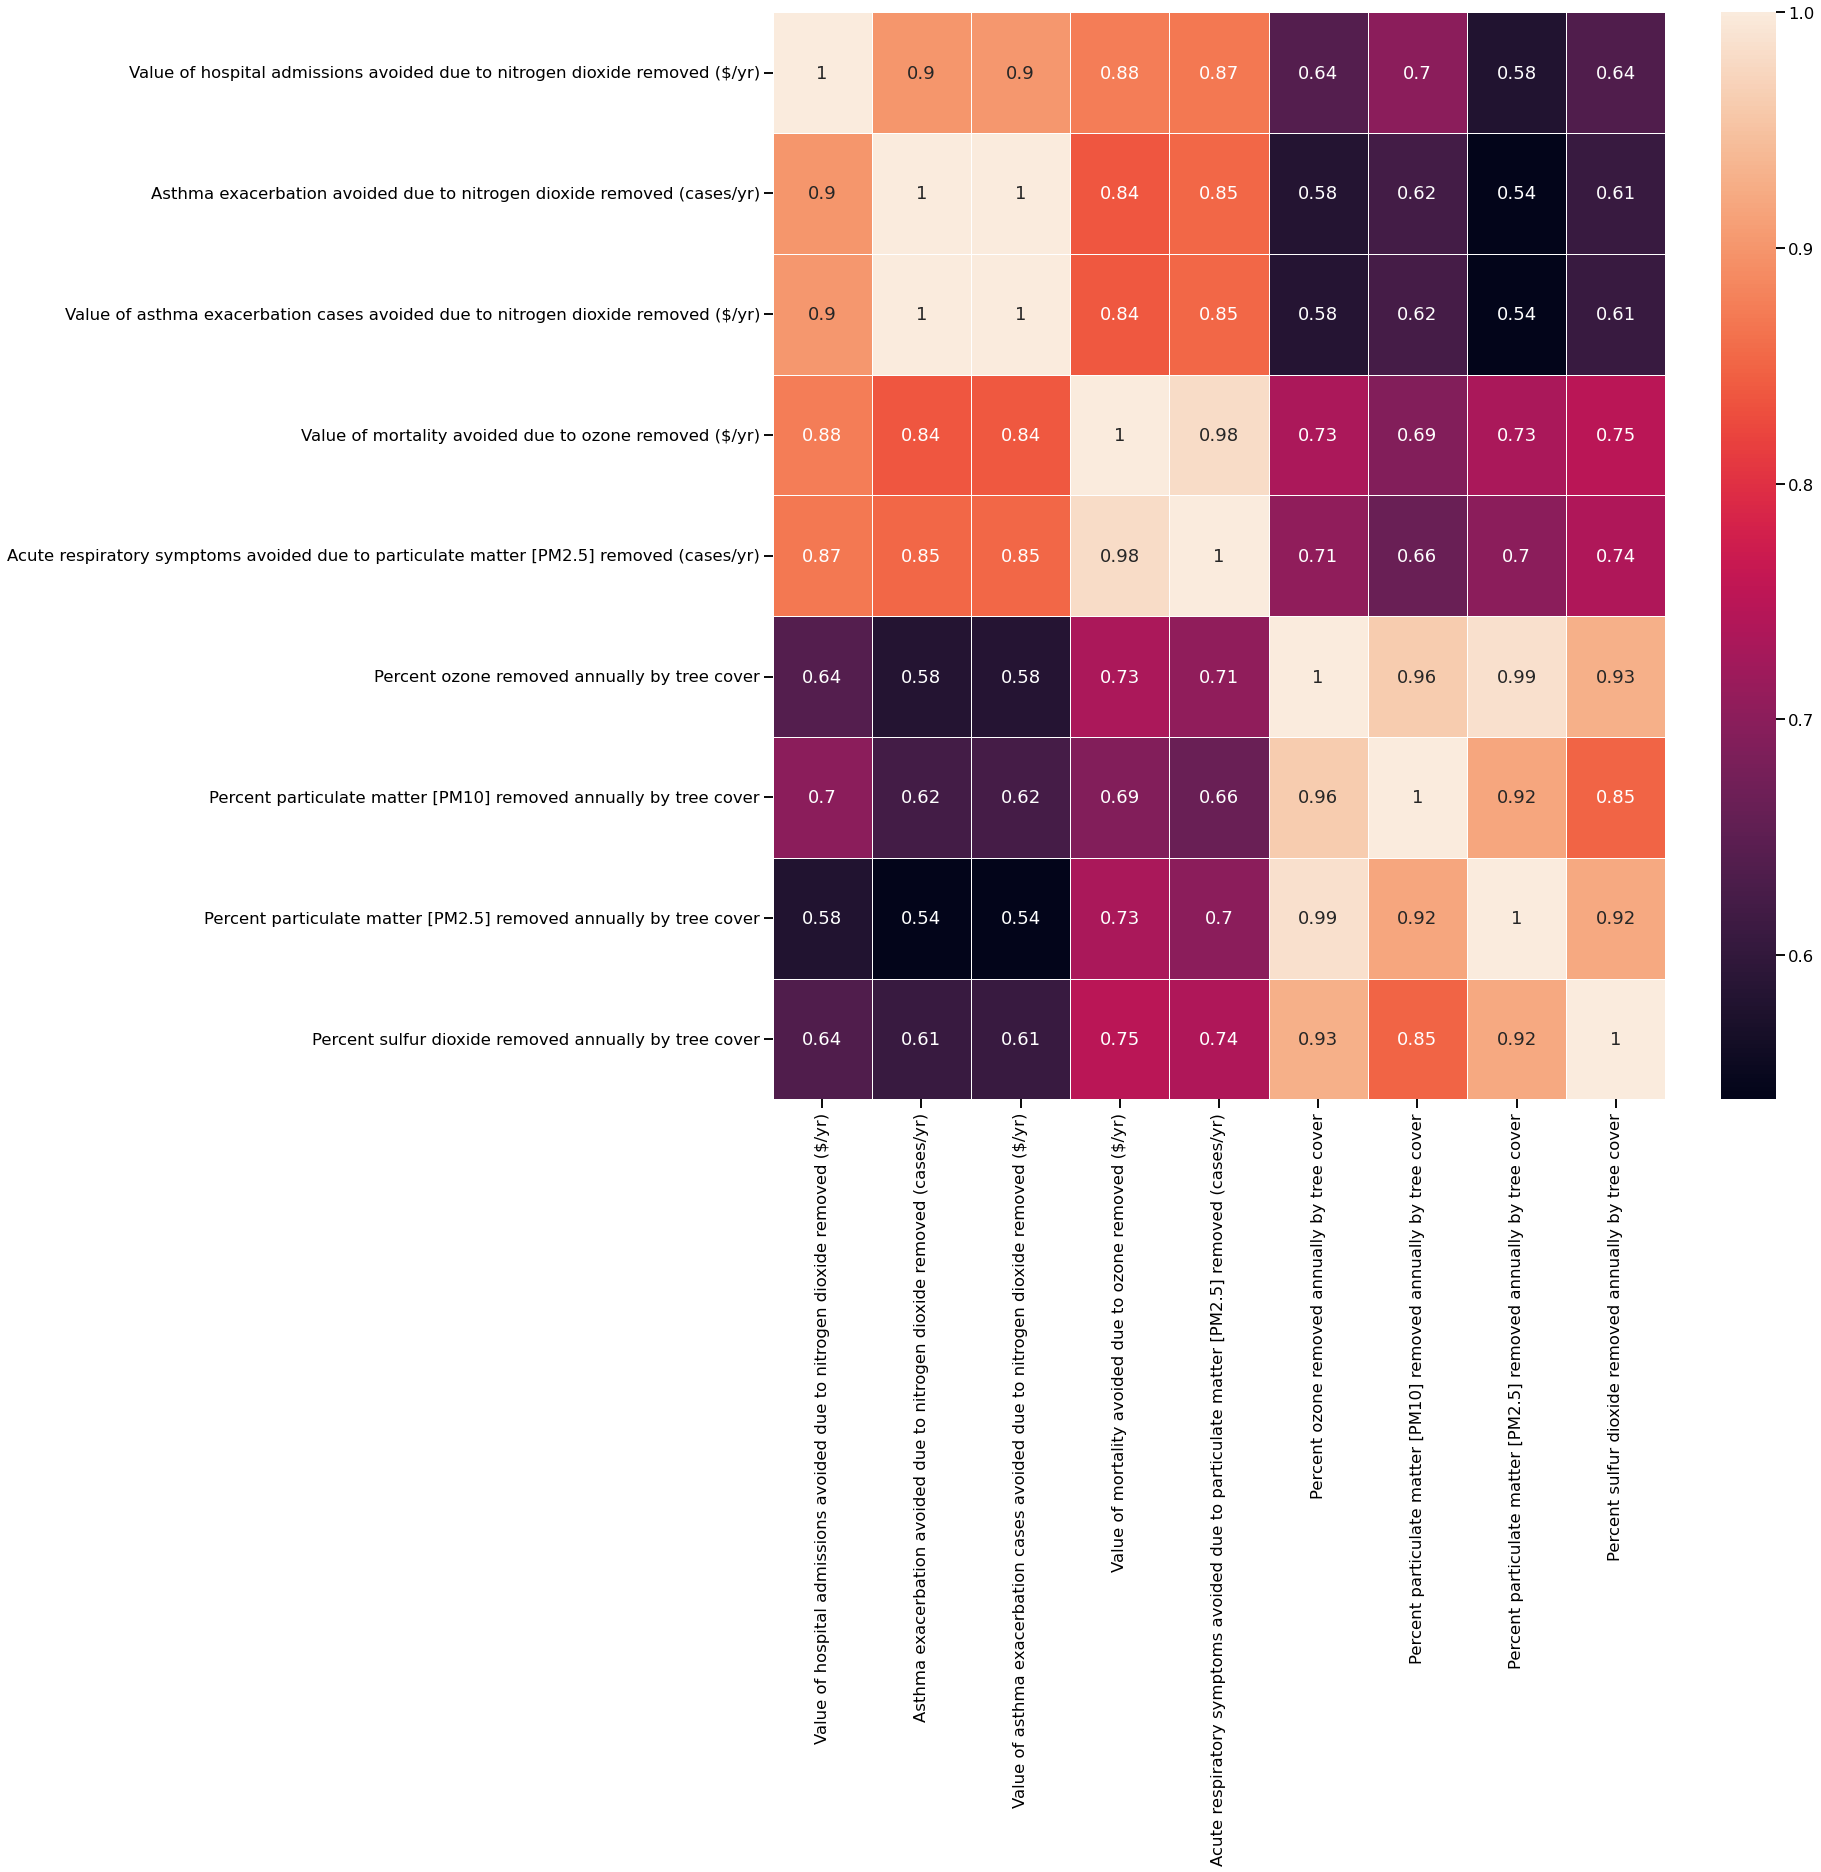

In [10]:
# Make heatmap of data
sns.set_context("talk")
_= plt.figure(figsize=(20,20))
heatmap = sns.heatmap(ari_green_df.corr(), annot=True, linewidth=0.6)
plt.show()

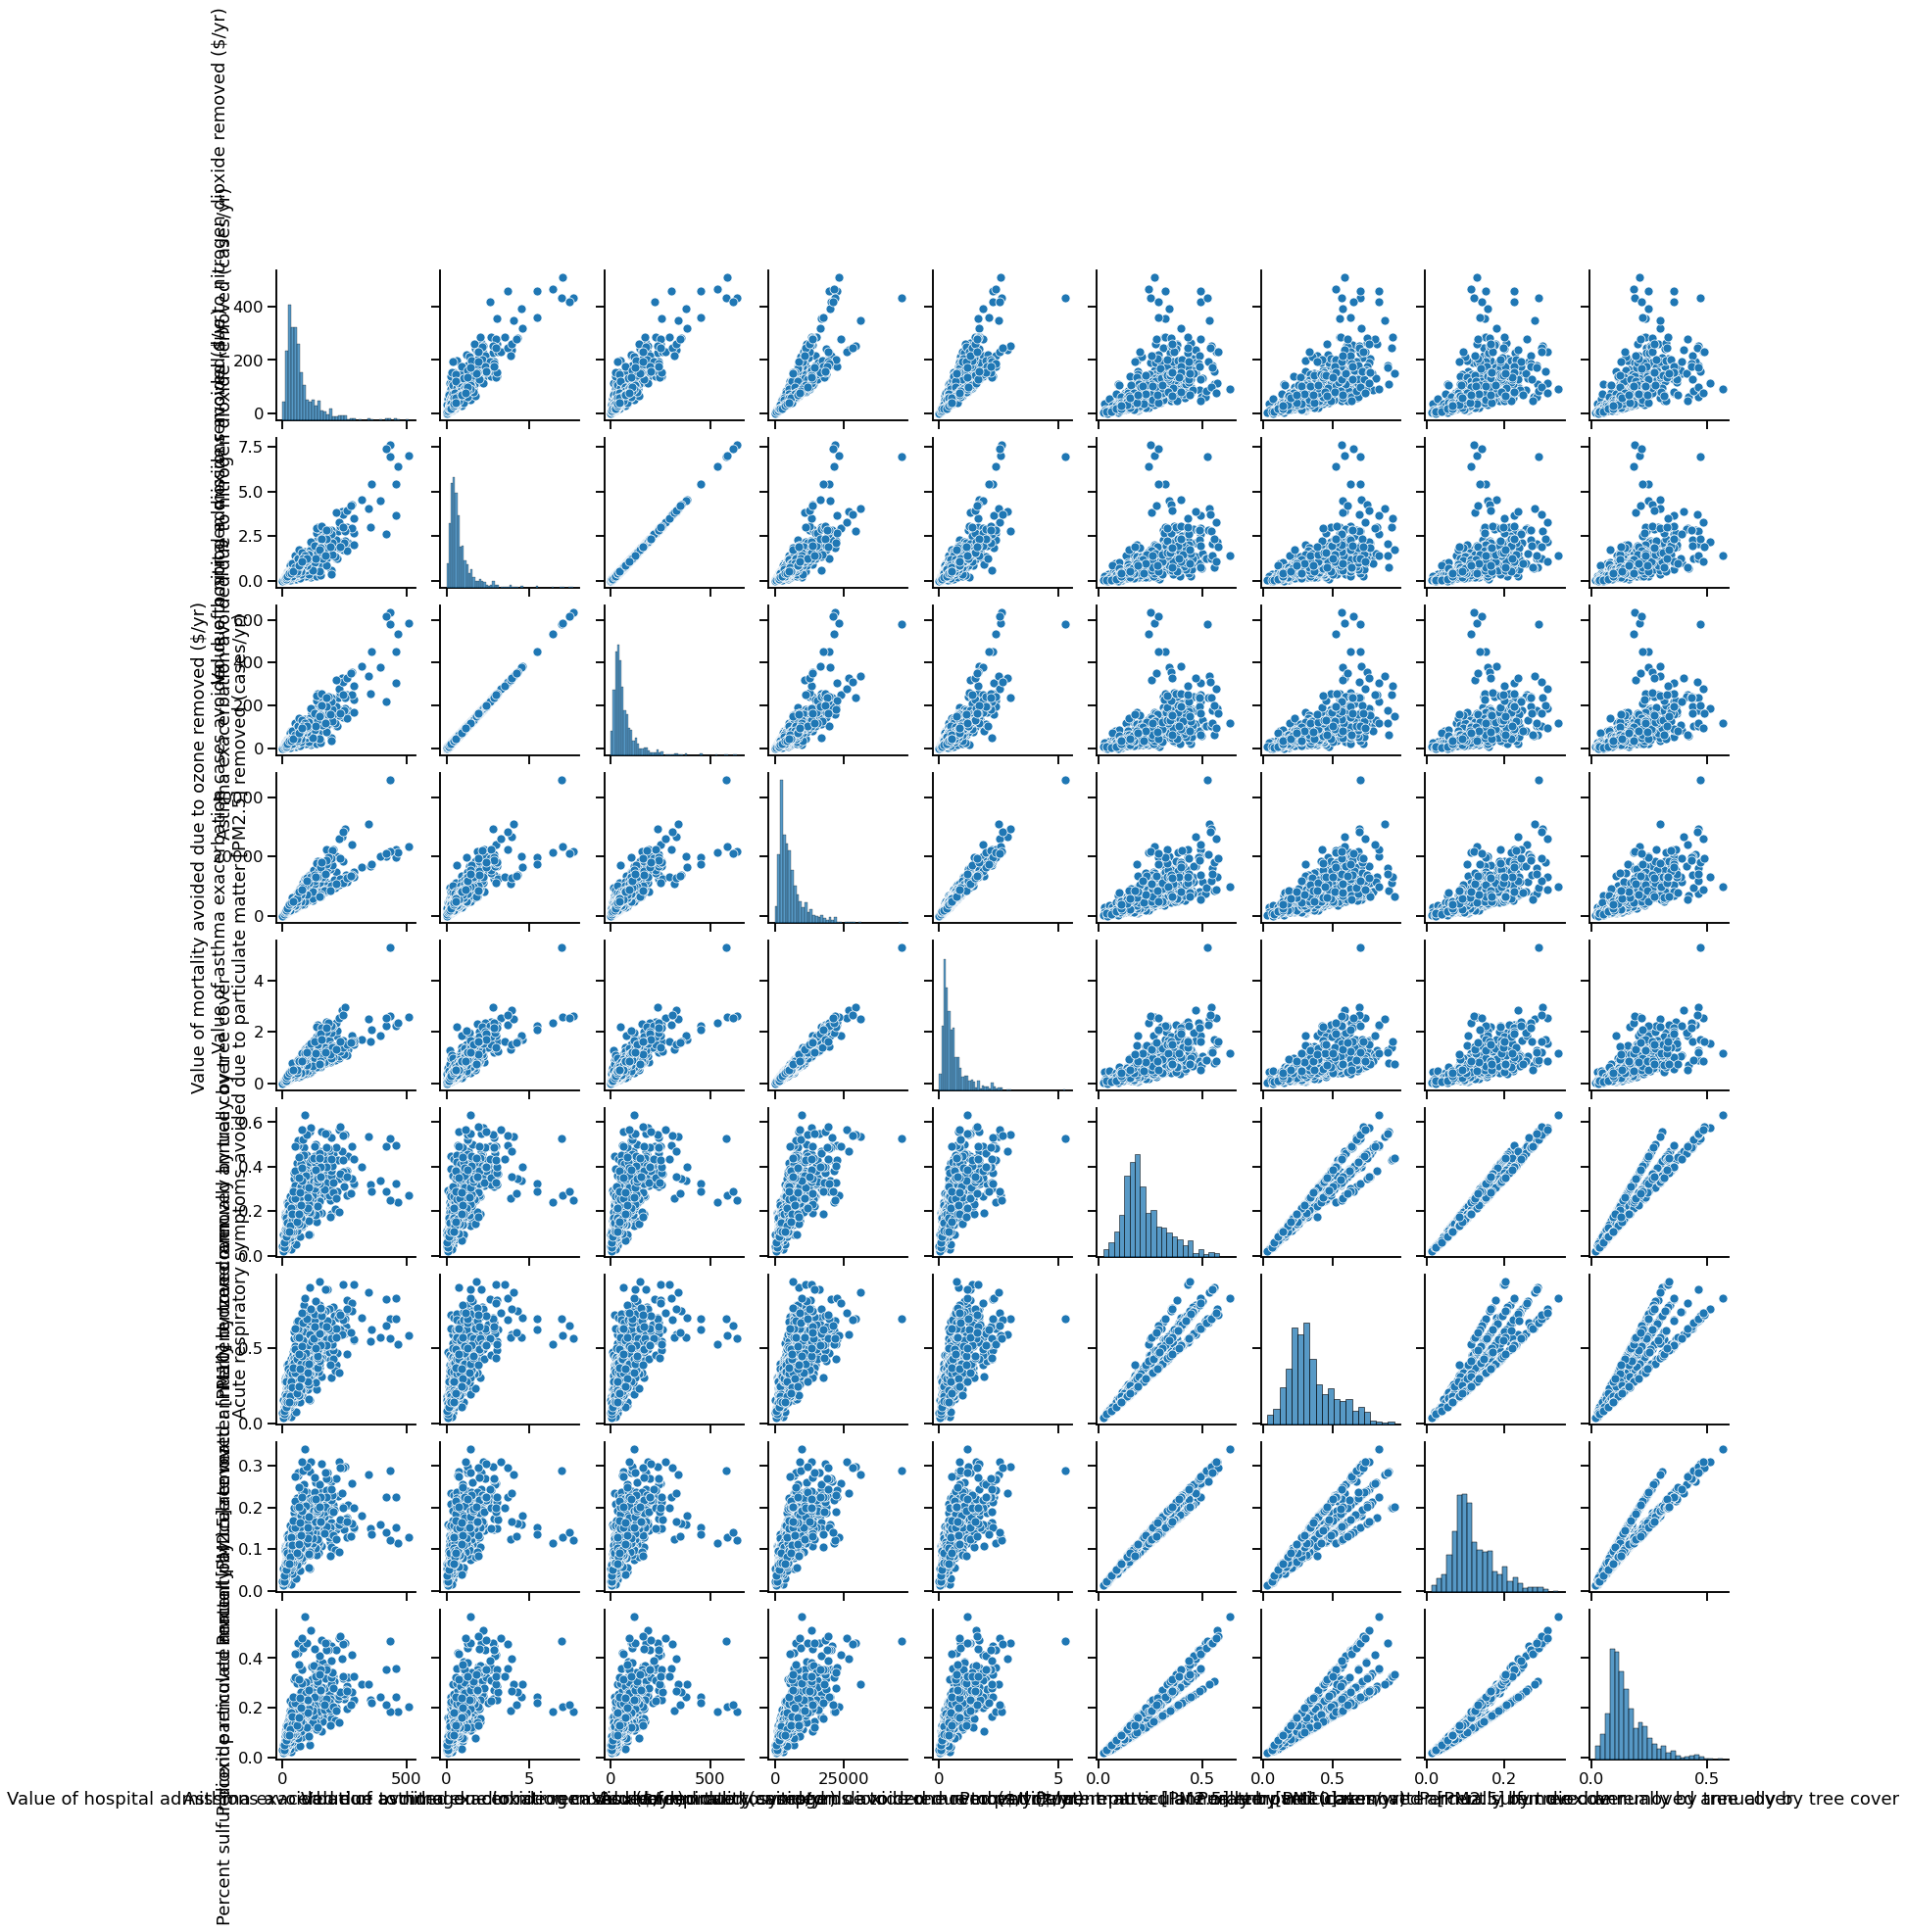

In [11]:
sns.pairplot(ari_green_df)

In [12]:
duplicateRowsDF = ari_green_df[ari_green_df.duplicated()]
duplicateRowsDF

,Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr),Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr),Value of asthma exacerbation cases avoided due to nitrogen dioxide removed ($/yr),Value of mortality avoided due to ozone removed ($/yr),Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr),Percent ozone removed annually by tree cover,Percent particulate matter [PM10] removed annually by tree cover,Percent particulate matter [PM2.5] removed annually by tree cover,Percent sulfur dioxide removed annually by tree cover,EnviroAtlas Community Name


In [13]:
# Convert columns with percentages to percent
ari_green_df['Percent ozone removed annually by tree cover'] = round(ari_green_df['Percent ozone removed annually by tree cover']*100, 1)
ari_green_df['Percent particulate matter [PM10] removed annually by tree cover'] = round(ari_green_df['Percent particulate matter [PM10] removed annually by tree cover']*100, 1)
ari_green_df['Percent particulate matter [PM2.5] removed annually by tree cover'] = round(ari_green_df['Percent particulate matter [PM2.5] removed annually by tree cover']*100, 1)
ari_green_df['Percent sulfur dioxide removed annually by tree cover'] = round(ari_green_df['Percent sulfur dioxide removed annually by tree cover']*100, 1)

In [14]:
ari_green_df['Percent particulate matter [PM2.5] removed annually by tree cover'].dtype

dtype('float64')

In [15]:
# Convert everything else to integer
ari_green_df['Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr)'] = ari_green_df['Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr)'].astype(int)
ari_green_df['Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr)'] = ari_green_df['Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr)'].astype(int)
ari_green_df['Value of asthma exacerbation cases avoided due to nitrogen dioxide removed ($/yr)'] = ari_green_df['Value of asthma exacerbation cases avoided due to nitrogen dioxide removed ($/yr)'].astype(int)
ari_green_df['Value of mortality avoided due to ozone removed ($/yr)'] = ari_green_df['Value of mortality avoided due to ozone removed ($/yr)'].astype(int)
ari_green_df['Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)'] = ari_green_df['Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)'].astype(int)

In [16]:
ari_green_df.head()

,Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr),Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr),Value of asthma exacerbation cases avoided due to nitrogen dioxide removed ($/yr),Value of mortality avoided due to ozone removed ($/yr),Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr),Percent ozone removed annually by tree cover,Percent particulate matter [PM10] removed annually by tree cover,Percent particulate matter [PM2.5] removed annually by tree cover,Percent sulfur dioxide removed annually by tree cover,EnviroAtlas Community Name
0,64,0,48,4429,0,22.5,32.5,12.5,17.1,"Cleveland, OH"
1,50,0,38,3520,0,16.3,23.5,9.2,12.4,"Cleveland, OH"
2,214,1,104,14768,1,26.6,38.8,14.6,20.2,"Cleveland, OH"
3,89,0,43,6157,0,25.2,36.7,13.9,19.1,"Cleveland, OH"
4,56,0,27,3867,0,21.4,31.2,11.9,16.3,"Cleveland, OH"


## Green Space Data

In [17]:
green_space0 = ds_ppm[['Particulate matter [PM2.5] (kg/yr)','Particulate matter [PM10] (kg/yr)','Percent tree cover','Percent green space', 'Tree cover per capita (m2/person)', 'Green space per capita (m2/person)','Percent tree cover in 50m buffer','Percent tree cover in 15m buffer']]

In [18]:
green_space0

,Particulate matter [PM2.5] (kg/yr),Particulate matter [PM10] (kg/yr),Percent tree cover,Percent green space,Tree cover per capita (m2/person),Green space per capita (m2/person),Percent tree cover in 50m buffer,Percent tree cover in 15m buffer
0,16.205080,55.922721,29.610001,54.439999,51.24,94.23,-99999.000000,-99999.000000
1,12.644147,43.634163,21.330000,43.369999,36.26,73.71,-99999.000000,-99999.000000
2,106.485574,368.951163,35.040001,62.790001,119.84,214.73,35.099998,31.240000
3,40.643110,140.820227,33.080002,58.110001,103.59,181.98,-99999.000000,-99999.000000
4,19.542090,67.709424,28.080000,54.160000,67.31,129.81,-99999.000000,-99999.000000
...,...,...,...,...,...,...,...,...
901,438.825464,1743.023022,42.450001,78.230003,447.62,824.99,0.000000,-99999.000000
902,495.005728,1966.172090,40.889999,81.190002,628.72,1248.39,43.299999,52.310001
903,4239.370399,9977.708923,76.269997,95.339996,8956.32,11195.93,84.820000,89.019997
904,2174.720165,8597.594365,72.230003,92.709999,5887.34,7556.28,86.099998,85.300003


In [19]:
# Round to one decimal place and convert percentages to percent
green_space0['Particulate matter [PM2.5] (kg/yr)'] = round(green_space0['Particulate matter [PM2.5] (kg/yr)'], 1)
green_space0['Particulate matter [PM10] (kg/yr)'] = round(green_space0['Particulate matter [PM10] (kg/yr)'], 1)
green_space0['Percent tree cover'] = round(green_space0['Percent tree cover']*100, 1)
green_space0['Percent green space'] = round(green_space0['Percent green space']*100, 1)
green_space0['Tree cover per capita (m2/person)'] = round(green_space0['Tree cover per capita (m2/person)'], 1)
green_space0['Green space per capita (m2/person)'] = round(green_space0['Green space per capita (m2/person)'], 1)

In [20]:
green_space0.head(3)

,Particulate matter [PM2.5] (kg/yr),Particulate matter [PM10] (kg/yr),Percent tree cover,Percent green space,Tree cover per capita (m2/person),Green space per capita (m2/person),Percent tree cover in 50m buffer,Percent tree cover in 15m buffer
0,16.2,55.9,2961.0,5444.0,51.2,94.2,-99999.000000,-99999.00
1,12.6,43.6,2133.0,4337.0,36.3,73.7,-99999.000000,-99999.00
2,106.5,369.0,3504.0,6279.0,119.8,214.7,35.099998,31.24


In [21]:
green_space0['Percent tree cover in 50m buffer'] = round(green_space0['Percent tree cover in 50m buffer'], 1)
green_space0['Percent tree cover in 15m buffer'] = round(green_space0['Percent tree cover in 15m buffer'], 1)

In [22]:
not_green = green_space0[green_space0['Percent tree cover in 50m buffer'] == -99999.0]
not_green2 = green_space0[green_space0['Percent tree cover in 15m buffer'] == -99999.0]
green = green_space0[green_space0['Percent tree cover in 50m buffer'] != -99999.0]

In [23]:
# Percent tree cover in 15m buffer with very sparse vegetation
not_green2.shape

(588, 8)

In [24]:
# Percent tree cover in 50m buffer with very sparse vegetation
not_green.shape

(558, 8)

In [25]:
# Percent tree cover in 50m buffer with dense to sparse vegetation
green.shape

(348, 8)

In [26]:
# Add "Cleveland, OH" as a column under 'EnviroAtlas Community Name'
not_green["EnviroAtlas Community Name"] = "Cleveland, OH"
not_green2["EnviroAtlas Community Name"] = "Cleveland, OH"
green["EnviroAtlas Community Name"] = "Cleveland, OH"

**VEGETATION INDEX**

- Dense: 70-100%
- Mid-dense: 30-70%
- Sparse: 10-30%
- Very sparse: <10%

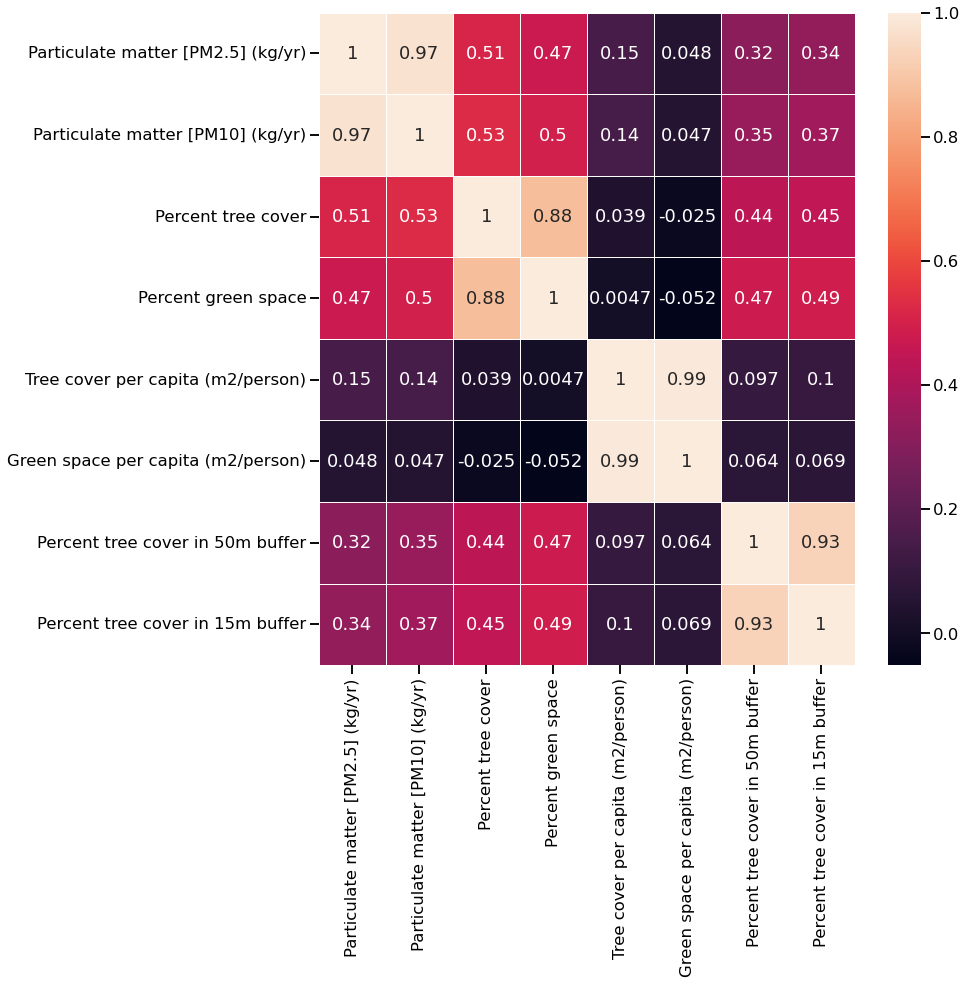

In [27]:
# Create heatmap for green_df
sns.set_context("talk")
_= plt.figure(figsize=(12,12))
heatmap = sns.heatmap(green_space0.corr(), annot=True, linewidth=0.6)
plt.show()

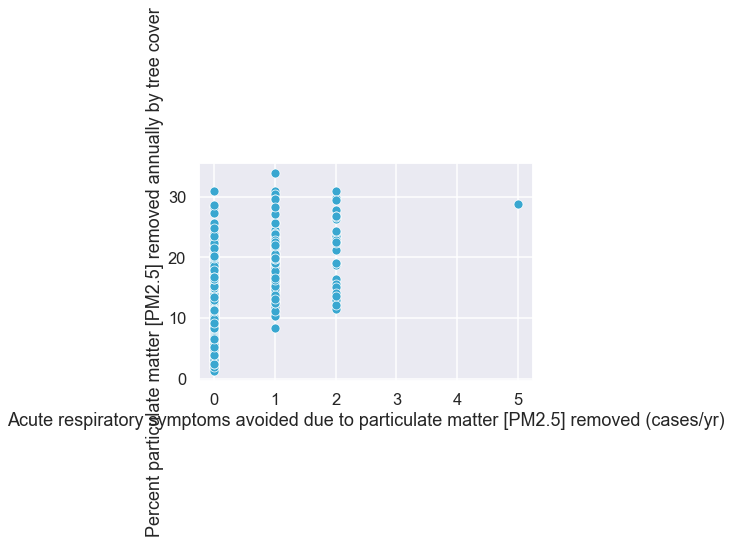

In [28]:
sns.set_style("darkgrid")
custom_palette = ["#39A7D0","#36ADA4"]
sns.set_palette(custom_palette)

sns.scatterplot(x='Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)', y='Percent particulate matter [PM2.5] removed annually by tree cover', data=ari_green_df)
plt.show()

<AxesSubplot:xlabel='Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)', ylabel='Percent particulate matter [PM2.5] removed annually by tree cover'>

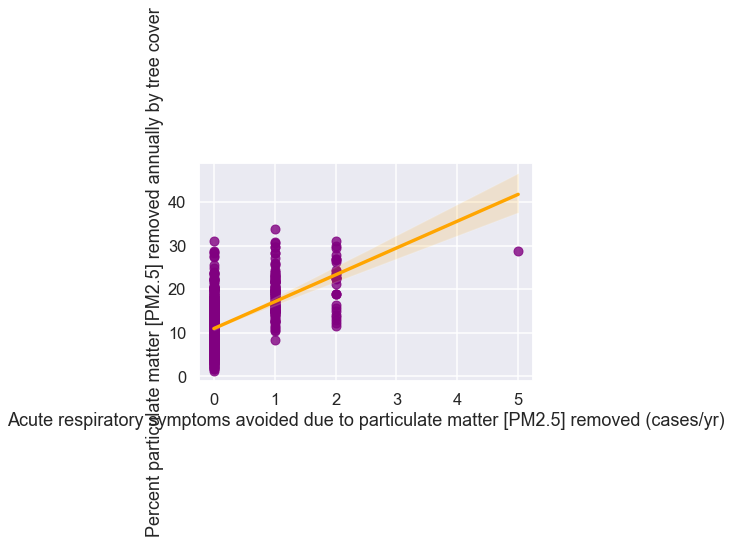

In [29]:
sns.regplot(x='Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)', y='Percent particulate matter [PM2.5] removed annually by tree cover', data=ari_green_df, scatter_kws={"color": "purple"}, line_kws={"color": "orange"})

### Rolling OLS for Cleveland

In [30]:
# Change column names to target, feature0 and feature1
ari_green_df.rename(columns = {"Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)":"target"}, inplace=True)
ari_green_df.rename(columns = {"Percent particulate matter [PM2.5] removed annually by tree cover":"feature0"}, inplace=True)
ari_green_df.rename(columns = {"Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr)":"feature1"}, inplace=True)

In [31]:
ari_green_df.columns

Index(['Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr)',
       'feature1',
       'Value of asthma exacerbation cases avoided due to nitrogen dioxide removed ($/yr)',
       'Value of mortality avoided due to ozone removed ($/yr)', 'target',
       'Percent ozone removed annually by tree cover',
       'Percent particulate matter [PM10] removed annually by tree cover',
       'feature0', 'Percent sulfur dioxide removed annually by tree cover',
       'EnviroAtlas Community Name'],
      dtype='object')

In [32]:
cle_ari_green = ari_green_df[['Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr)', 
                             'feature1', 'Value of asthma exacerbation cases avoided due to nitrogen dioxide removed ($/yr)',
                             'Value of mortality avoided due to ozone removed ($/yr)', 'target',
                             'Percent ozone removed annually by tree cover','Percent particulate matter [PM10] removed annually by tree cover',
                             'feature0', 'Percent sulfur dioxide removed annually by tree cover']]

In [33]:
# Import libraries
from statsmodels.regression.rolling import RollingOLS
import statsmodels.api as sm
from sklearn.datasets import make_regression

# Fit model using formula and a window of 25. -1 suppresses the intercept
roll_reg = RollingOLS.from_formula('target ~ feature0 + feature1 -1', window=25, data=cle_ari_green)
model_cle = roll_reg.fit()

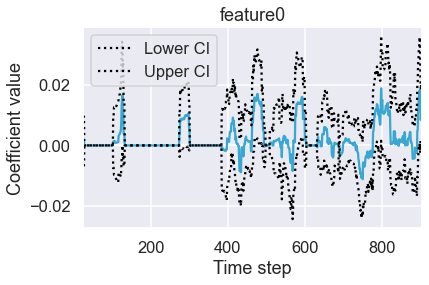

<Figure size 2880x2880 with 0 Axes>

In [34]:
fig_cle = model_cle.plot_recursive_coefficient(variables=['feature0'])
plt.xlabel('Time step')
plt.ylabel('Coefficient value')
plt.figure(figsize=(40,40))
plt.show()

### Recursive LS for Cleveland

In [35]:
reg_rls = sm.RecursiveLS.from_formula(
    'target ~ feature0 + feature1 -1', cle_ari_green)
model_rls = reg_rls.fit()
print(model_rls.summary())

                           Statespace Model Results                           
Dep. Variable:                 target   No. Observations:                  906
Model:                    RecursiveLS   Log Likelihood                -235.034
Date:                Sun, 12 Jun 2022   R-squared:                       0.647
Time:                        21:03:57   AIC                            474.069
Sample:                             0   BIC                            483.687
                                - 906   HQIC                           477.742
Covariance Type:            nonrobust   Scale                            0.096
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
feature0       0.0049      0.001      5.240      0.000       0.003       0.007
feature1       0.4098      0.013     30.386      0.000       0.383       0.436
Ljung-Box (L1) (Q):                  36.91   Jarque-

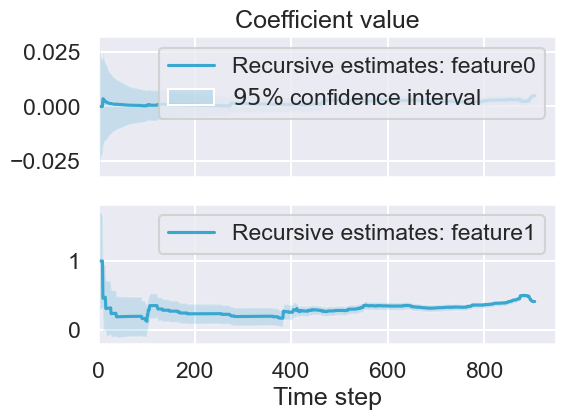

In [36]:
# Check how the values of coefficients changed in real time
fig0 = model_rls.plot_recursive_coefficient(range(reg_rls.k_exog), legend_loc='upper right')
ax_list = fig0.axes
for ax in ax_list:
    ax.set_xlim(0, None)
ax.figure.set_dpi(100)
ax_list[-1].set_xlabel('Time step')
ax_list[0].set_title('Coefficient value');

In [37]:
cle_ari_green.describe()

,Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr),feature1,Value of asthma exacerbation cases avoided due to nitrogen dioxide removed ($/yr),Value of mortality avoided due to ozone removed ($/yr),target,Percent ozone removed annually by tree cover,Percent particulate matter [PM10] removed annually by tree cover,feature0,Percent sulfur dioxide removed annually by tree cover
count,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000
mean,75.165563,0.381898,70.475717,5902.937086,0.185430,22.497903,35.478366,12.123179,15.702870
std,68.237521,0.842164,71.402400,4901.492687,0.487238,10.733754,17.175684,5.504573,8.729938
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.300000,3.300000,1.300000,1.900000
25%,33.000000,0.000000,31.000000,2624.000000,0.000000,15.225000,23.300000,8.500000,9.700000
50%,55.000000,0.000000,50.000000,4476.000000,0.000000,19.850000,31.700000,10.800000,13.200000
75%,90.750000,1.000000,84.000000,7401.500000,0.000000,27.975000,45.275000,15.000000,19.700000
max,509.000000,7.000000,635.000000,46008.000000,5.000000,63.500000,94.300000,33.900000,56.600000


## Split Train and Test Set

In [38]:
from sklearn.model_selection import train_test_split
# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
x_train, x_test, y_train, y_test = train_test_split(cle_ari_green["feature0"], cle_ari_green["target"], train_size = 0.75, test_size = 0.25, shuffle = True)

In [39]:
# We now want to check the shape of the X train, y_train, X_test and y_test to make sure the proportions are right. 
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(679,) (679,) (227,) (227,)


### Making a Linear Regression model: Model 1

In [40]:
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings 

rModel = linear_model.LinearRegression(normalize=True)
x_train_ = np.array(x_train).reshape(-1,1)
y_train_ = np.array(y_train).reshape(-1,1)
print(x_train_.shape, y_train_.shape)

(679, 1) (679, 1)


In [41]:
rModel.fit(x_train_, y_train_)

LinearRegression(normalize=True)

In [42]:
# Evaluate the model  
rModel.score(x_train_, y_train_)

0.2783868113100101

The above number is our R-squred coefficient. Model 1 explains only about 29% of the variation from the mean. Let's keep going.

In [43]:
x_test_ = np.array(x_test).reshape(-1,1)

In [44]:
# Use the model to make predictions about our test data
y_predict = rModel.predict(x_test_)

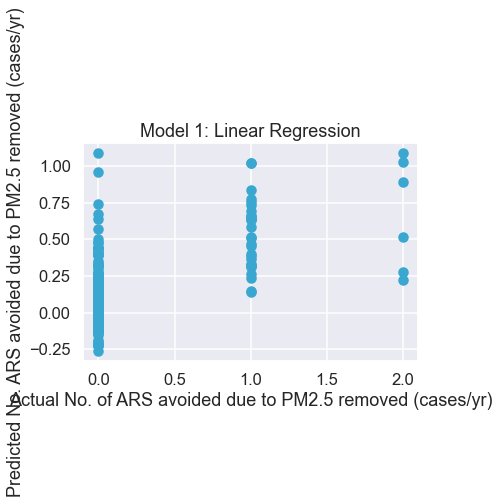

In [45]:
# Let's plot the predictions against the actual result. Use scatter()
_ = plt.scatter(y_test, y_predict)
_ = plt.xlabel("Actual No. of ARS avoided due to PM2.5 removed (cases/yr)")
_ = plt.ylabel("Predicted No. ARS avoided due to PM2.5 removed (cases/yr)")
_ = plt.title("Model 1: Linear Regression")
plt.show()

## Multiple Linear Regression - Model 2

In [46]:
# Create test and train datasets
# This is again very similar, but now we include more columns in the predictors
# Include all columns from data in the explanatory variables X except fixed.acidity and quality (which was an integer)
X = cle_ari_green.drop(["target"], axis=1)

# Create constants for X, so the model knows its bounds
X0 = sm.add_constant(X)

In [47]:
X0.shape

(906, 9)

In [48]:
# Split the data
Y = cle_ari_green[["target"]]
x0_train, x0_test, y0_train, y0_test = train_test_split(X0, Y, test_size=0.25, shuffle=True)

In [49]:
y0_train

,target
681,0
252,0
311,0
743,0
550,2
...,...
187,0
200,0
353,0
719,0


In [50]:
x0_train

,const,Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr),feature1,Value of asthma exacerbation cases avoided due to nitrogen dioxide removed ($/yr),Value of mortality avoided due to ozone removed ($/yr),Percent ozone removed annually by tree cover,Percent particulate matter [PM10] removed annually by tree cover,feature0,Percent sulfur dioxide removed annually by tree cover
681,1.0,83,1,94,7458,28.8,46.9,15.8,15.8
252,1.0,29,0,31,2747,13.8,22.3,7.8,7.6
311,1.0,48,0,42,4216,16.7,27.1,9.5,9.2
743,1.0,78,0,60,3931,22.5,38.9,10.7,16.2
550,1.0,458,3,305,22475,49.5,83.3,22.6,35.7
...,...,...,...,...,...,...,...,...,...
187,1.0,15,0,16,1455,8.5,13.8,4.9,5.1
200,1.0,17,0,19,1219,15.6,23.1,8.8,12.9
353,1.0,34,0,26,2666,15.9,25.7,9.0,8.7
719,1.0,88,0,75,8880,24.4,39.8,13.5,13.4


In [51]:
# We can use almost identical code to create the third model, because it is the same algorithm, just different inputs
# Create the model
rModel_2 = sm.OLS(y0_train, x0_train.astype(float))

# Fit the model
fit_model2 = rModel_2.fit()

In [52]:
# Evaluate the model
fit_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     355.9
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          1.94e-235
Time:                        21:03:58   Log-Likelihood:                 88.537
No. Observations:                 679   AIC:                            -159.1
Df Residuals:                     670   BIC:                            -118.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================================================
                                                                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                -0.0834      0.027     -3.122      0.002      -0.136      -0.031
Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr)          -0.0015      0.000     -3.192      0.001      -0.002      -0.001
feature1                                                                              0.2460      0.033      7.412      0.000       0.181       0.311
Value of asthma exacerbation cases avoided due to nitrogen dioxide removed ($/yr)    -0.0008      0.000     -1.746      0.081      -0.002       0.000
Value of mortality avoided due to ozone removed ($/yr)                             9.133e-05   6.22e-06     14.692      0.000    7.91e-05       0.000
Percent ozone removed annually by tree cover                                          0.0240      0.012      1.994      0.047       0.000       0.048
Percent particulate matter [PM10] removed annually by tree cover                     -0.0116      0.003     -3.682      0.000      -0.018      -0.005
feature0                                                                             -0.0307      0.016     -1.905      0.057      -0.062       0.001
Percent sulfur dioxide removed annually by tree cover                                 0.0033      0.003      1.032      0.302      -0.003       0.010
==============================================================================
Omnibus:                       38.086   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.441
Skew:                           0.093   Prob(JB):                     2.12e-28
Kurtosis:                       5.114   Cond. No.                     3.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Nice Model 2 is predicting around 83% of the variation!

In [53]:
# Use our new model to make predictions
y0_predict = fit_model2.predict(x0_test)

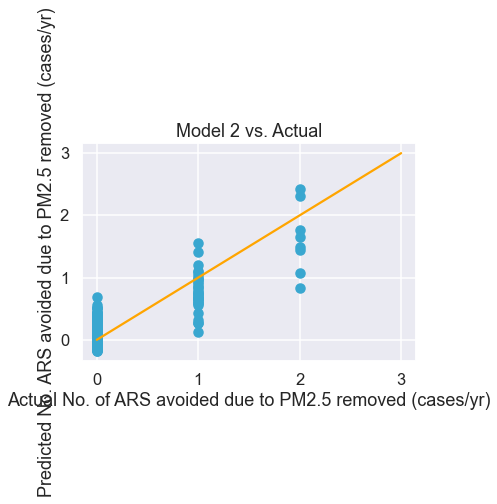

In [54]:
# Plot the predictions
# Build a scatterplot
_ = plt.scatter(y0_test, y0_predict)
_ = plt.title("Model 2 vs. Actual")
_ = plt.xlabel("Actual No. of ARS avoided due to PM2.5 removed (cases/yr)")
_ = plt.ylabel("Predicted No. ARS avoided due to PM2.5 removed (cases/yr)")
# Add a line for perfect correlation
_ = plt.plot([x for x in range(0,4)], [x for x in range(0,4)], color = "orange")
plt.show()

Next, we'll try RMSE, since it is recommended that RMSE be used as the primary metric to interpret the model.

In [55]:
# Define a function to check the RMSE
def RMSE(predictions, actual):
    return np.sqrt(np.mean((predictions-actual) **2))

In [56]:
# Get predictions from rModel3
y2_predict = fit_model2.predict(x0_test)
# Put the predictions & actual values into a dataframe
df = pd.DataFrame(y0_test)
df.rename(columns = {"target":"actual"}, inplace=True)
df["predicted"] = y0_predict

RMSE(df["predicted"], df["actual"])

0.25065242298234347

The RMSE tells us how far, on average, our predictions were mistaken. An RMSE of 0 would mean we were making perfect predictions. 0.23 signifies that we are, on average, about 0.23 of a unit of No. of Acute respiratory symptoms avoided due to PM2.5 removed (cases/yr) away from the correct answer.

### Model building, again

In [57]:
x1_train, x1_test, y1_train, y1_test = train_test_split(cle_ari_green["feature0"], cle_ari_green["target"], train_size = 0.75, test_size = 0.25, shuffle = True)

In [58]:
print(x1_train.shape, y1_train.shape, x1_test.shape, y1_test.shape)

(679,) (679,) (227,) (227,)


In [59]:
X1 = cle_ari_green.drop(["target"], axis=1)

# Create constants for X, so the model knows its bounds
X_const = sm.add_constant(X1)

# Split the data
Y1 = cle_ari_green[["target"]]
x1_train_, x1_test_, y1_train_, y1_test_ = train_test_split(X_const, Y1, test_size=0.25, shuffle=True)

In [60]:
X_const

,const,Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr),feature1,Value of asthma exacerbation cases avoided due to nitrogen dioxide removed ($/yr),Value of mortality avoided due to ozone removed ($/yr),Percent ozone removed annually by tree cover,Percent particulate matter [PM10] removed annually by tree cover,feature0,Percent sulfur dioxide removed annually by tree cover
0,1.0,64,0,48,4429,22.5,32.5,12.5,17.1
1,1.0,50,0,38,3520,16.3,23.5,9.2,12.4
2,1.0,214,1,104,14768,26.6,38.8,14.6,20.2
3,1.0,89,0,43,6157,25.2,36.7,13.9,19.1
4,1.0,56,0,27,3867,21.4,31.2,11.9,16.3
...,...,...,...,...,...,...,...,...,...
901,1.0,358,5,453,17497,29.0,62.8,13.7,22.0
902,1.0,277,4,350,13537,28.0,60.5,13.2,21.2
903,1.0,232,1,162,19326,57.9,72.3,29.6,48.8
904,1.0,171,1,119,14285,54.9,89.4,28.3,46.2


In [61]:
rModel_3 = sm.OLS(y1_train_, x1_train_)

# Fit the model
fit_model3 = rModel_3.fit()

In [62]:
fit_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     335.9
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          1.08e-228
Time:                        21:03:59   Log-Likelihood:                 62.202
No. Observations:                 679   AIC:                            -106.4
Df Residuals:                     670   BIC:                            -65.72
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================================================
                                                                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                -0.0931      0.028     -3.342      0.001      -0.148      -0.038
Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr)          -0.0015      0.000     -3.016      0.003      -0.002      -0.001
feature1                                                                              0.1915      0.034      5.577      0.000       0.124       0.259
Value of asthma exacerbation cases avoided due to nitrogen dioxide removed ($/yr)    -0.0003      0.000     -0.647      0.518      -0.001       0.001
Value of mortality avoided due to ozone removed ($/yr)                             9.491e-05   6.61e-06     14.355      0.000    8.19e-05       0.000
Percent ozone removed annually by tree cover                                          0.0305      0.012      2.584      0.010       0.007       0.054
Percent particulate matter [PM10] removed annually by tree cover                     -0.0122      0.003     -3.975      0.000      -0.018      -0.006
feature0                                                                             -0.0416      0.016     -2.555      0.011      -0.074      -0.010
Percent sulfur dioxide removed annually by tree cover                                 0.0018      0.003      0.565      0.573      -0.005       0.008
==============================================================================
Omnibus:                       29.393   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.390
Skew:                           0.099   Prob(JB):                     5.76e-18
Kurtosis:                       4.663   Cond. No.                     3.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Residual Plot and Heteroscedasticity

In [63]:
# Use our new model to make predictions
y3_predict = fit_model3.predict(x1_test_)

In [64]:
residual = y1_train_ - y3_predict

eval_env: 1


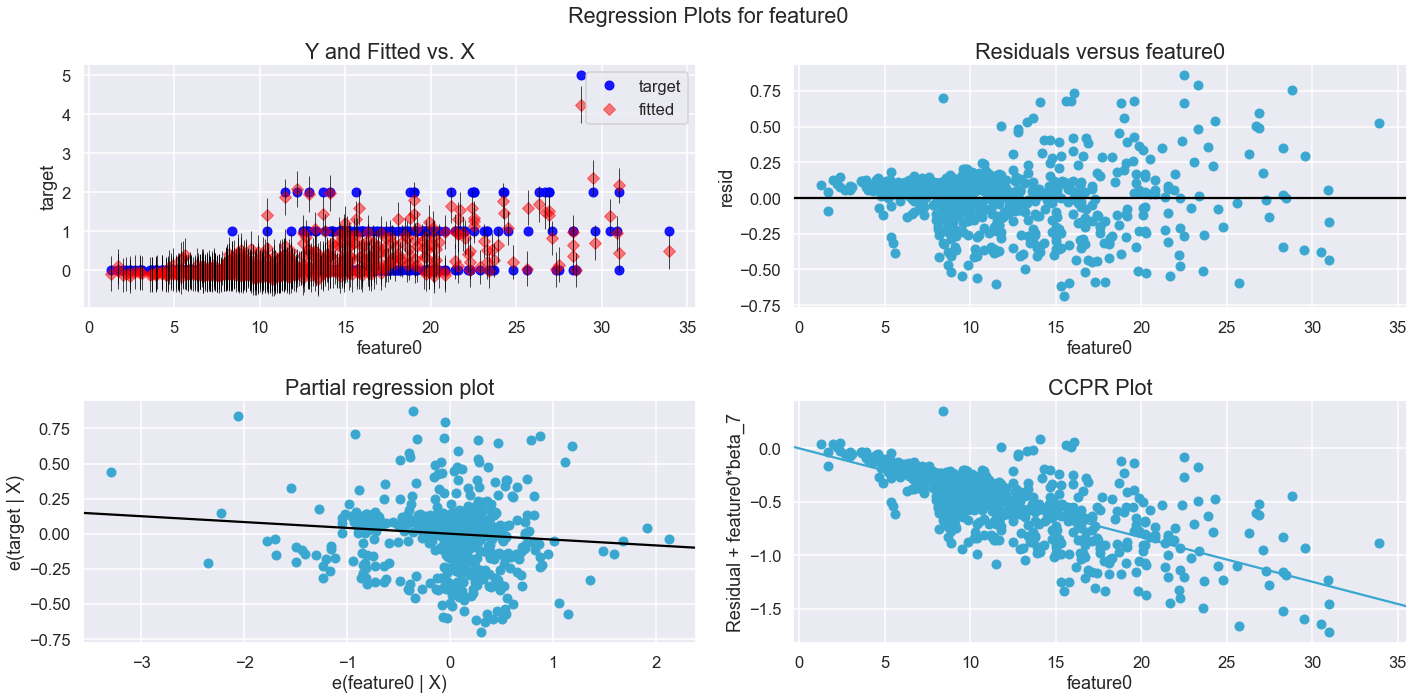

In [65]:
from statsmodels.formula.api import ols

#define figure size
fig = plt.figure(figsize=(20,10))

#produce regression plots
fig = sm.graphics.plot_regress_exog(fit_model3, "feature0", fig=fig)

## Los Angeles, CA

In [66]:
path1 = r'D:\Tree-Canopy-Percentage-Air-Quality-Correlation-to-Acute-Resp-Illnesses-in-Ohio-cities-Project_\la_gs_air_data.xlsx'
ds_ppm1 = pd.read_excel(path1)
ds_ppm1.head()

,OBJECTID,Shape,Block group id,EnviroAtlas Community Code,Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr),Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr),Value of asthma exacerbation cases avoided due to nitrogen dioxide removed ($/yr),Acute respiratory symptoms avoided due to ozone removed (cases/yr),Value of mortality avoided due to ozone removed ($/yr),School days not lost to illness due to ozone removed (days/yr),...,Population in 0.2% Annual Chance Flood Hazard area - Percent,EnviroAtlas Community Name,State FIPS,County FIPS,Tract FIPS,ALAND10,AWATER10,ORIG_FID,x,y
0,40016,NaN,60371011101,LACA,232.700333,4.621569,388.165154,3.663356,9411.092911,1.239871,...,-99999.0,"Los Angeles, CA",6,37,101110,NaN,NaN,39956,NaN,NaN
1,40017,NaN,60371011102,LACA,162.382258,3.225041,270.870722,2.556422,6567.555006,0.865227,...,-99999.0,"Los Angeles, CA",6,37,101110,NaN,NaN,39957,NaN,NaN
2,40018,NaN,60371011103,LACA,75.376890,1.497046,125.736685,1.186674,3048.616396,0.401632,...,-99999.0,"Los Angeles, CA",6,37,101110,NaN,NaN,39958,NaN,NaN
3,40019,NaN,60371011221,LACA,270.446280,4.035866,337.660622,3.782109,9890.491036,1.092984,...,-99999.0,"Los Angeles, CA",6,37,101122,NaN,NaN,39959,NaN,NaN
4,40020,NaN,60371011222,LACA,199.868247,2.985032,249.743703,2.798180,7317.189982,0.808640,...,-99999.0,"Los Angeles, CA",6,37,101122,NaN,NaN,39960,NaN,NaN


In [67]:
ds_ppm1.isnull().sum()

OBJECTID                                                                          0
Shape                                                                          4960
Block group id                                                                    0
EnviroAtlas Community Code                                                        0
Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr)       0
                                                                               ... 
ALAND10                                                                        4960
AWATER10                                                                       4960
ORIG_FID                                                                          0
x                                                                              4960
y                                                                              4960
Length: 128, dtype: int64

In [68]:
dfo1 = ds_ppm1.select_dtypes(include=['object'])
dfo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   EnviroAtlas Community Code  4960 non-null   object
 1   EnviroAtlas Community Name  4960 non-null   object
dtypes: object(2)
memory usage: 77.6+ KB


In [69]:
ds_ppm1.columns

Index(['OBJECTID', 'Shape', 'Block group id', 'EnviroAtlas Community Code',
       'Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr)',
       'Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr)',
       'Value of asthma exacerbation cases avoided due to nitrogen dioxide removed ($/yr)',
       'Acute respiratory symptoms avoided due to ozone removed (cases/yr)',
       'Value of mortality avoided due to ozone removed ($/yr)',
       'School days not lost to illness due to ozone removed (days/yr)',
       ...
       'Population in 0.2% Annual Chance Flood Hazard area - Percent',
       'EnviroAtlas Community Name', 'State FIPS', 'County FIPS', 'Tract FIPS',
       'ALAND10', 'AWATER10', 'ORIG_FID', 'x', 'y'],
      dtype='object', length=128)

In [70]:
ari_green_df1 = ds_ppm1[['Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr)', 'Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr)', 'Value of asthma exacerbation cases avoided due to nitrogen dioxide removed ($/yr)','Value of mortality avoided due to ozone removed ($/yr)', 'Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)', 'Percent ozone removed annually by tree cover', 'Percent particulate matter [PM10] removed annually by tree cover', 'Percent particulate matter [PM2.5] removed annually by tree cover', 'Percent sulfur dioxide removed annually by tree cover', 'EnviroAtlas Community Name' ]]
ari_green_df1.head()

,Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr),Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr),Value of asthma exacerbation cases avoided due to nitrogen dioxide removed ($/yr),Value of mortality avoided due to ozone removed ($/yr),Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr),Percent ozone removed annually by tree cover,Percent particulate matter [PM10] removed annually by tree cover,Percent particulate matter [PM2.5] removed annually by tree cover,Percent sulfur dioxide removed annually by tree cover,EnviroAtlas Community Name
0,232.700333,4.621569,388.165154,9411.092911,0.395562,0.389107,1.013244,0.014046,0.262544,"Los Angeles, CA"
1,162.382258,3.225041,270.870722,6567.555006,0.276030,0.299848,0.782821,0.011444,0.202332,"Los Angeles, CA"
2,75.376890,1.497046,125.736685,3048.616396,0.128133,0.254908,0.666392,0.009993,0.172011,"Los Angeles, CA"
3,270.446280,4.035866,337.660622,9890.491036,0.403065,0.350525,0.914864,0.012308,0.236374,"Los Angeles, CA"
4,199.868247,2.985032,249.743703,7317.189982,0.298208,0.436357,1.136601,0.014436,0.294418,"Los Angeles, CA"


In [71]:
np.sum(ari_green_df1.isna())

Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr)                0
Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr)                     0
Value of asthma exacerbation cases avoided due to nitrogen dioxide removed ($/yr)          0
Value of mortality avoided due to ozone removed ($/yr)                                     0
Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)    0
Percent ozone removed annually by tree cover                                               0
Percent particulate matter [PM10] removed annually by tree cover                           0
Percent particulate matter [PM2.5] removed annually by tree cover                          0
Percent sulfur dioxide removed annually by tree cover                                      0
EnviroAtlas Community Name                                                                 0
dtype: int64

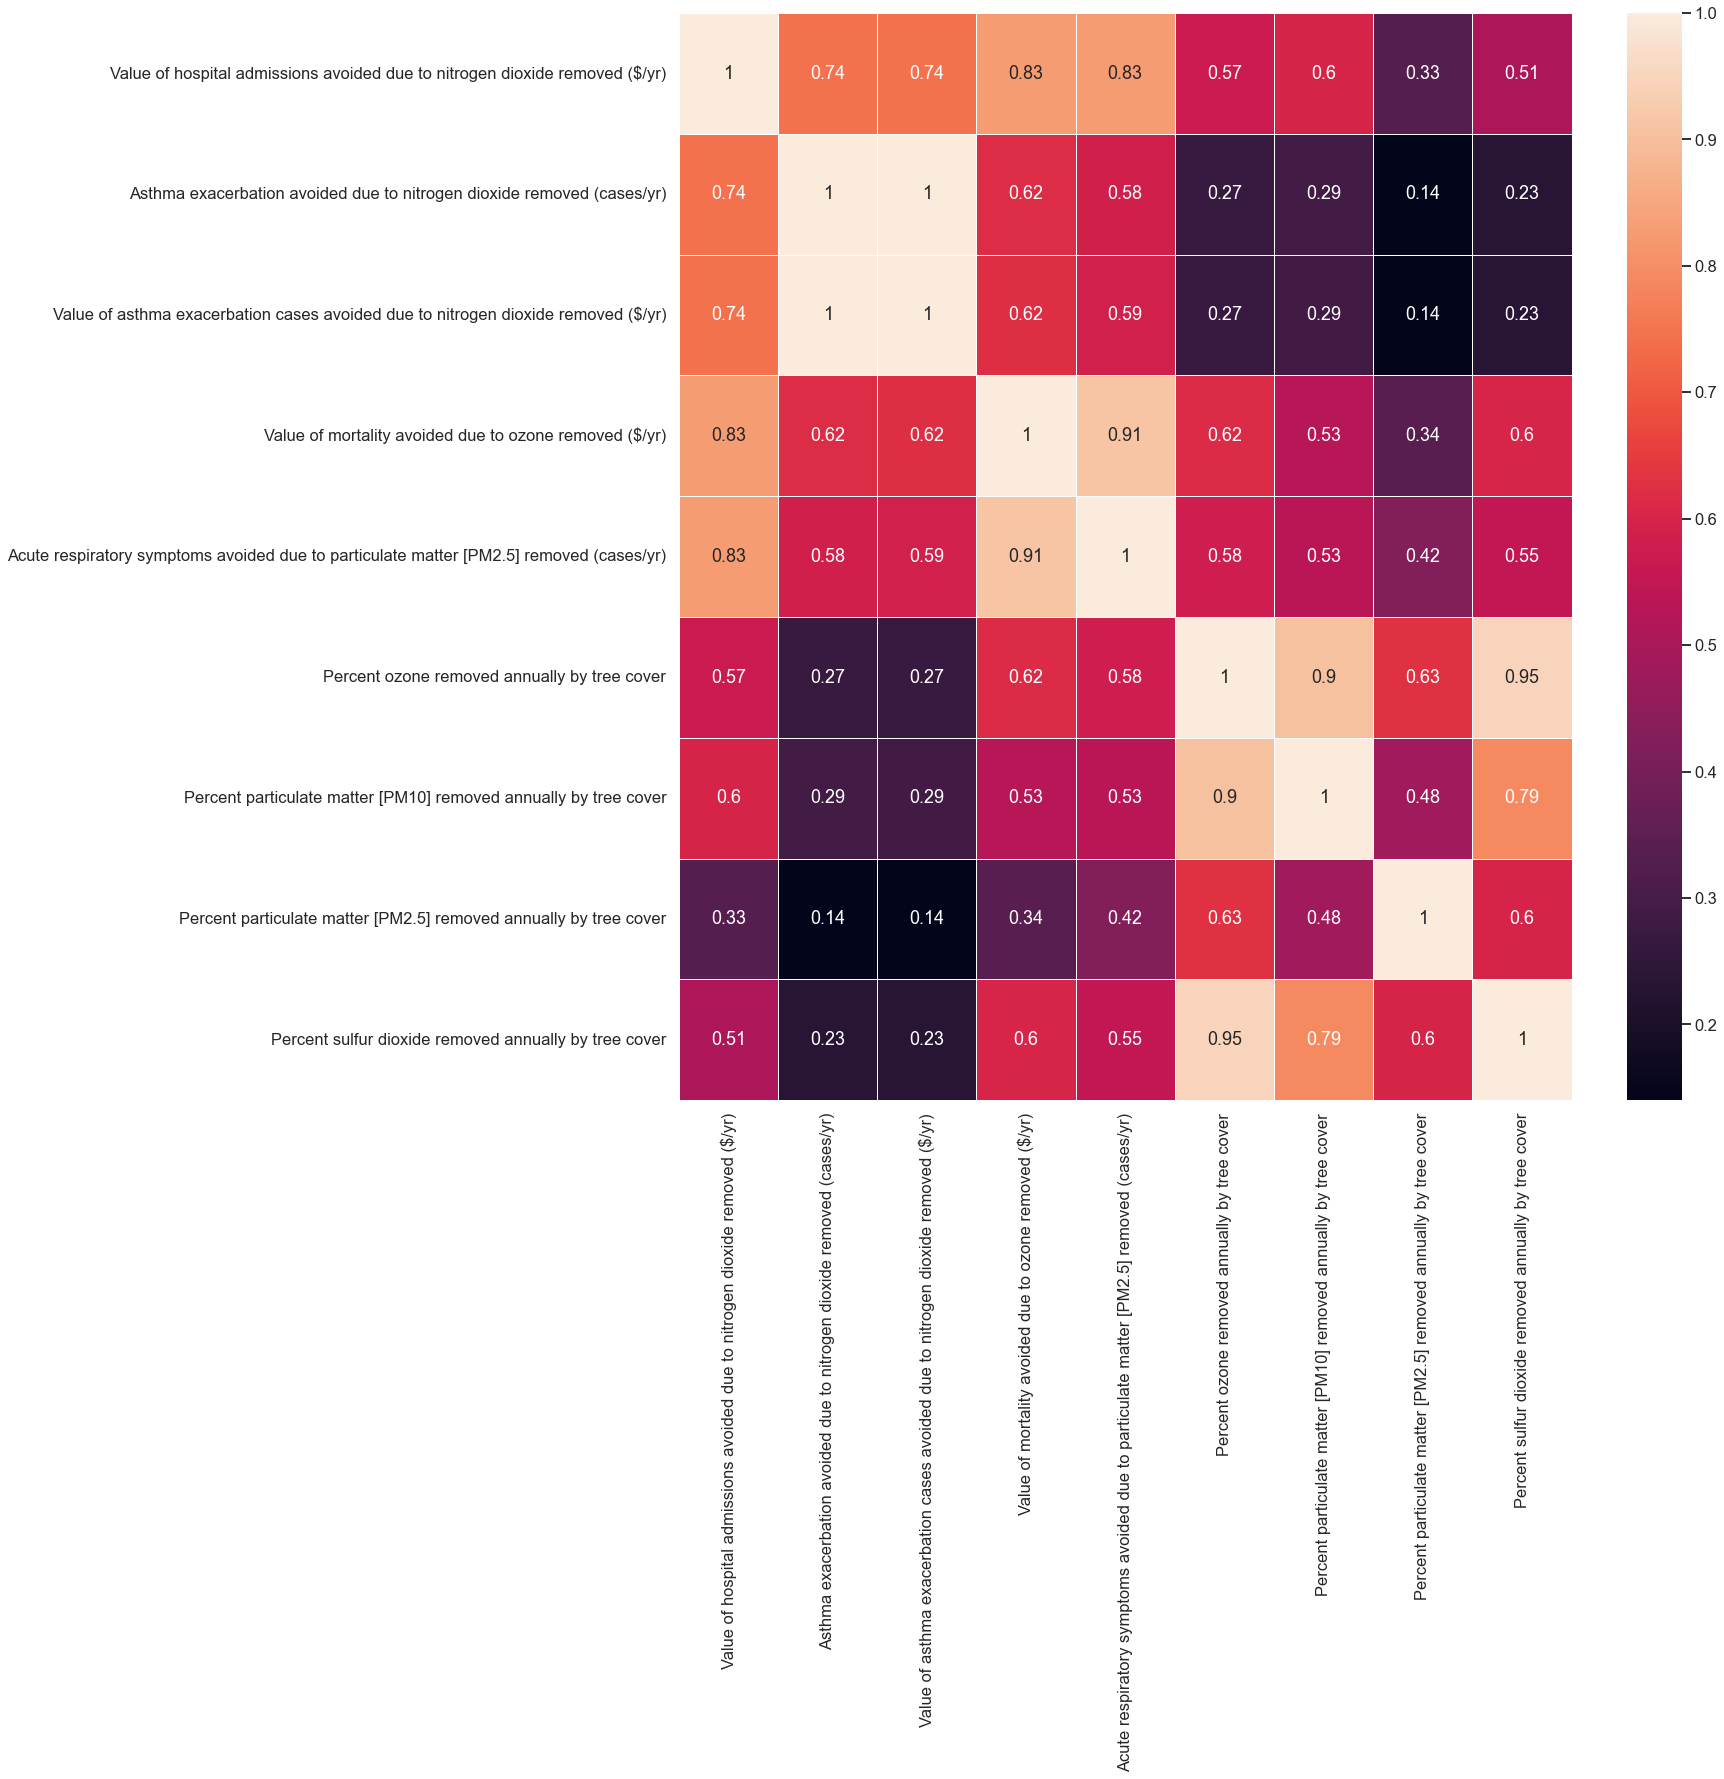

In [72]:
# Make heatmap of data
sns.set_context("talk")
_= plt.figure(figsize=(20,20))
heatmap = sns.heatmap(ari_green_df1.corr(), annot=True, linewidth=0.6)
plt.show()

In [73]:
# Convert columns with percentages to percent
ari_green_df1['Percent ozone removed annually by tree cover'] = round(ari_green_df1['Percent ozone removed annually by tree cover']*100, 1)
ari_green_df1['Percent particulate matter [PM10] removed annually by tree cover'] = round(ari_green_df1['Percent particulate matter [PM10] removed annually by tree cover']*100, 1)
ari_green_df1['Percent particulate matter [PM2.5] removed annually by tree cover'] = round(ari_green_df1['Percent particulate matter [PM2.5] removed annually by tree cover']*100, 1)
ari_green_df1['Percent sulfur dioxide removed annually by tree cover'] = round(ari_green_df1['Percent sulfur dioxide removed annually by tree cover']*100, 1)

In [74]:
# Convert everything else to integer
ari_green_df1['Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr)'] = ari_green_df1['Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr)'].astype(int)
ari_green_df1['Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr)'] = ari_green_df1['Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr)'].astype(int)
ari_green_df1['Value of asthma exacerbation cases avoided due to nitrogen dioxide removed ($/yr)'] = ari_green_df1['Value of asthma exacerbation cases avoided due to nitrogen dioxide removed ($/yr)'].astype(int)
ari_green_df1['Value of mortality avoided due to ozone removed ($/yr)'] = ari_green_df1['Value of mortality avoided due to ozone removed ($/yr)'].astype(int)
ari_green_df1['Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)'] = ari_green_df1['Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)'].astype(int)

In [75]:
ari_green_df1.columns

Index(['Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr)',
       'Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr)',
       'Value of asthma exacerbation cases avoided due to nitrogen dioxide removed ($/yr)',
       'Value of mortality avoided due to ozone removed ($/yr)',
       'Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)',
       'Percent ozone removed annually by tree cover',
       'Percent particulate matter [PM10] removed annually by tree cover',
       'Percent particulate matter [PM2.5] removed annually by tree cover',
       'Percent sulfur dioxide removed annually by tree cover',
       'EnviroAtlas Community Name'],
      dtype='object')

### Green Space Data

In [76]:
green_space1 = ds_ppm1[['Particulate matter [PM2.5] (kg/yr)','Particulate matter [PM10] (kg/yr)','Percent tree cover','Percent green space', 'Tree cover per capita (m2/person)', 'Green space per capita (m2/person)','Percent tree cover in 50m buffer','Percent tree cover in 15m buffer']]

In [77]:
green_space1.head(5)

,Particulate matter [PM2.5] (kg/yr),Particulate matter [PM10] (kg/yr),Percent tree cover,Percent green space,Tree cover per capita (m2/person),Green space per capita (m2/person),Percent tree cover in 50m buffer,Percent tree cover in 15m buffer
0,10.007576,364.817087,27.910000,47.009998,63,107,-99999.00,-99999.000000
1,6.099864,222.365007,21.459999,38.250000,43,76,-99999.00,-99999.000000
2,4.981210,181.585467,18.230000,39.070000,64,136,-99999.00,-99999.000000
3,31.618561,1174.204063,25.100000,50.529999,173,349,22.52,21.030001
4,26.144734,970.925053,31.309999,55.580002,242,429,34.98,44.990002


In [78]:
# Round to one decimal place and convert percentages to percent
green_space1['Particulate matter [PM2.5] (kg/yr)'] = round(green_space1['Particulate matter [PM2.5] (kg/yr)'], 1)
green_space1['Particulate matter [PM10] (kg/yr)'] = round(green_space1['Particulate matter [PM10] (kg/yr)'], 1)
green_space1['Percent tree cover'] = round(green_space1['Percent tree cover']*100, 1)
green_space1['Percent green space'] = round(green_space1['Percent green space']*100, 1)
green_space1['Tree cover per capita (m2/person)'] = round(green_space1['Tree cover per capita (m2/person)'], 1)
green_space1['Green space per capita (m2/person)'] = round(green_space1['Green space per capita (m2/person)'], 1)
green_space1['Percent tree cover in 50m buffer'] = round(green_space1['Percent tree cover in 50m buffer'], 1)
green_space1['Percent tree cover in 15m buffer'] = round(green_space1['Percent tree cover in 15m buffer'], 1)

In [79]:
not_green_la = green_space1[green_space1['Percent tree cover in 50m buffer'] == -99999.0]
not_green2_la = green_space1[green_space1['Percent tree cover in 15m buffer'] == -99999.0]
green1 = green_space1[green_space1['Percent tree cover in 50m buffer'] != -99999.0]

In [80]:
green1.head()

,Particulate matter [PM2.5] (kg/yr),Particulate matter [PM10] (kg/yr),Percent tree cover,Percent green space,Tree cover per capita (m2/person),Green space per capita (m2/person),Percent tree cover in 50m buffer,Percent tree cover in 15m buffer
3,31.6,1174.2,2510.0,5053.0,173,349,22.5,21.0
4,26.1,970.9,3131.0,5558.0,242,429,35.0,45.0
7,8.8,317.4,3286.0,5059.0,94,145,44.5,52.5
8,6.8,246.7,2313.0,3505.0,38,58,24.3,38.0
9,49.8,1809.6,4503.0,6871.0,476,726,59.4,71.7


In [81]:
print('% tree cover in 50m buffer with very sparse: ', not_green_la.shape)
print('% tree cover in 15m buffer with very sparse: ', not_green2_la.shape)
print('Dense to sparse: ', green1.shape)

% tree cover in 50m buffer with very sparse:  (3668, 8)
% tree cover in 15m buffer with very sparse:  (3773, 8)
Dense to sparse:  (1292, 8)


## Analysis on Tree Canopy/Green Space

Using the same dataset, we will make an analysis on green space and tree canopy percentage. We'll have to do some cleaning on the data first.

Before we continue, let's define some key terms. **Tree Cover per capita**, the metric we will look at, provides a baseline for the percent of tree cover per capita in any given block group in the greater community.
Tree coverage takes many forms, including street trees, parks, urban forests, and single trees. on various properties. **Green space** is the square meters of total land per person within each census block group that is covered by vegetation, or green space. Green space may include trees, lawns and gardens, crop land, and wetlands.

### CLE vs LA

In [82]:
cle_ari_green.columns

Index(['Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr)',
       'feature1',
       'Value of asthma exacerbation cases avoided due to nitrogen dioxide removed ($/yr)',
       'Value of mortality avoided due to ozone removed ($/yr)', 'target',
       'Percent ozone removed annually by tree cover',
       'Percent particulate matter [PM10] removed annually by tree cover',
       'feature0', 'Percent sulfur dioxide removed annually by tree cover'],
      dtype='object')

In [83]:
# Let's rename those columns back to their original
cle_ari_green.rename(columns = {"target":"Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)"}, inplace=True)
cle_ari_green.rename(columns = {"feature0":"Percent particulate matter [PM2.5] removed annually by tree cover"}, inplace=True)
cle_ari_green.rename(columns = {"feature1":"Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr)"}, inplace=True)

We are going to use the dataset with dense to sparse vegetation (the ones without -9999.00).

In [84]:
green.columns

Index(['Particulate matter [PM2.5] (kg/yr)',
       'Particulate matter [PM10] (kg/yr)', 'Percent tree cover',
       'Percent green space', 'Tree cover per capita (m2/person)',
       'Green space per capita (m2/person)',
       'Percent tree cover in 50m buffer', 'Percent tree cover in 15m buffer',
       'EnviroAtlas Community Name'],
      dtype='object')

In [85]:
green["EnviroAtlas Community Name"] = "Cleveland, OH"
green.head(3)

,Particulate matter [PM2.5] (kg/yr),Particulate matter [PM10] (kg/yr),Percent tree cover,Percent green space,Tree cover per capita (m2/person),Green space per capita (m2/person),Percent tree cover in 50m buffer,Percent tree cover in 15m buffer,EnviroAtlas Community Name
2,106.5,369.0,3504.0,6279.0,119.8,214.7,35.1,31.2,"Cleveland, OH"
5,73.7,253.8,2001.0,5351.0,152.4,407.5,27.5,27.7,"Cleveland, OH"
27,52.1,216.7,2954.0,5931.0,106.8,214.5,63.2,82.3,"Cleveland, OH"


In [86]:
green1["EnviroAtlas Community Name"] = "Los Angeles, CA"
green1.head(3)

,Particulate matter [PM2.5] (kg/yr),Particulate matter [PM10] (kg/yr),Percent tree cover,Percent green space,Tree cover per capita (m2/person),Green space per capita (m2/person),Percent tree cover in 50m buffer,Percent tree cover in 15m buffer,EnviroAtlas Community Name
3,31.6,1174.2,2510.0,5053.0,173,349,22.5,21.0,"Los Angeles, CA"
4,26.1,970.9,3131.0,5558.0,242,429,35.0,45.0,"Los Angeles, CA"
7,8.8,317.4,3286.0,5059.0,94,145,44.5,52.5,"Los Angeles, CA"


In [87]:
green.shape

(348, 9)

In [88]:
green1.shape

(1292, 9)

In [89]:
# Combine green space data for CLE and LA
df0 = green.append(green1, ignore_index=True)
df0['EnviroAtlas Community Name'].unique()

array(['Cleveland, OH', 'Los Angeles, CA'], dtype=object)

In [90]:
# Add "Los Angeles, LA" as a column under 'EnviroAtlas Community Name' for buffer data
not_green_la["EnviroAtlas Community Name"] = "Los Angeles, CA"

In [91]:
# Combine percent tree cover in 50m buffer with very sparse vegetation for CLE and LA
fifty_buffer_notgreen = not_green.append(not_green_la, ignore_index=True)

# Combine percent tree cover in 50m buffer with dense to sparse vegetation for CLE and LA
fifty_buffer_green = green.append(green1, ignore_index=True)

In [92]:
# Preliminary stats for CLE and LA for very sparse vegetation areas
fifty_buffer_notgreen.describe()

,Particulate matter [PM2.5] (kg/yr),Particulate matter [PM10] (kg/yr),Percent tree cover,Percent green space,Tree cover per capita (m2/person),Green space per capita (m2/person),Percent tree cover in 50m buffer,Percent tree cover in 15m buffer
count,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.0,4226.0
mean,9.763701,205.113914,1876.170374,3427.998817,36.150876,213.471060,-99999.0,-99999.0
std,16.436684,283.559181,835.827154,1318.582762,2633.386525,9898.963412,0.0,0.0
min,0.100000,4.000000,141.000000,224.000000,-99999.000000,-99999.000000,-99999.0,-99999.0
25%,2.800000,74.800000,1278.250000,2501.250000,19.000000,35.000000,-99999.0,-99999.0
50%,4.900000,132.100000,1713.500000,3267.500000,37.000000,70.000000,-99999.0,-99999.0
75%,9.300000,222.175000,2301.750000,4247.500000,68.000000,127.075000,-99999.0,-99999.0
max,276.000000,6642.200000,6091.000000,8663.000000,95518.000000,627402.000000,-99999.0,-99999.0


In [93]:
# Preliminary stats for CLE and LA for dense to sparse vegetation areas
fifty_buffer_green.describe()

,Particulate matter [PM2.5] (kg/yr),Particulate matter [PM10] (kg/yr),Percent tree cover,Percent green space,Tree cover per capita (m2/person),Green space per capita (m2/person),Percent tree cover in 50m buffer,Percent tree cover in 15m buffer
count,1640.000000,1640.000000,1640.000000,1640.000000,1.640000e+03,1.640000e+03,1640.000000,1640.000000
mean,146.571585,2928.556037,2515.701220,4539.315854,3.914607e+03,7.001131e+03,-3813.647073,-11983.356829
std,734.477800,28933.740754,1385.015925,1824.125313,7.303971e+04,1.008804e+05,19230.543579,32530.506505
min,0.800000,11.100000,122.000000,280.000000,-9.999900e+04,-9.999900e+04,-99998.000000,-99999.000000
25%,7.975000,204.100000,1548.250000,3227.250000,5.500000e+01,1.120000e+02,12.175000,6.800000
50%,17.750000,400.250000,2171.000000,4143.500000,1.126000e+02,2.200500e+02,21.600000,22.300000
75%,64.050000,916.875000,3220.500000,5844.250000,3.005000e+02,5.702500e+02,39.725000,45.925000
max,19178.900000,916477.500000,8372.000000,9606.000000,2.670240e+06,3.348926e+06,96.500000,100.000000


In [94]:
cle_buffernotgreen = fifty_buffer_notgreen[fifty_buffer_notgreen['EnviroAtlas Community Name'] == 'Cleveland, OH']
la_buffernotgreen = fifty_buffer_notgreen[fifty_buffer_notgreen['EnviroAtlas Community Name'] == 'Los Angeles, CA']

In [95]:
# Very sparse median values
print(cle_buffernotgreen['Percent tree cover'].median())
print(la_buffernotgreen['Percent tree cover'].median())

2275.5
1634.0


In [96]:
# Let's apply lambda to get better results
# Create separate dataset with just numerics for both CLE and LA
cle_subset_notgreen = cle_buffernotgreen.select_dtypes(exclude=['object'])
la_subset_notgreen = la_buffernotgreen.select_dtypes(exclude=['object'])

In [97]:
# Mean
cle_subset_notgreen.apply(lambda x: x.mean(),axis=0)

Particulate matter [PM2.5] (kg/yr)       33.378853
Particulate matter [PM10] (kg/yr)       121.275986
Percent tree cover                     2403.451613
Percent green space                    5187.541219
Tree cover per capita (m2/person)       102.983154
Green space per capita (m2/person)      225.680466
Percent tree cover in 50m buffer     -99999.000000
Percent tree cover in 15m buffer     -99999.000000
dtype: float64

In [98]:
# Mean
la_subset_notgreen.apply(lambda x: x.mean(),axis=0)

Particulate matter [PM2.5] (kg/yr)        6.171210
Particulate matter [PM10] (kg/yr)       217.867884
Percent tree cover                     1795.956925
Percent green space                    3160.325791
Tree cover per capita (m2/person)        25.983915
Green space per capita (m2/person)      211.613686
Percent tree cover in 50m buffer     -99999.000000
Percent tree cover in 15m buffer     -99999.000000
dtype: float64

In [99]:
cle_buffergreen = fifty_buffer_green[fifty_buffer_green['EnviroAtlas Community Name'] == 'Cleveland, OH']
la_buffergreen = fifty_buffer_green[fifty_buffer_green['EnviroAtlas Community Name'] == 'Los Angeles, CA']

In [100]:
# Green dataset
# Create separate dataset with just numerics for both CLE and LA
cle_subset_green = cle_buffergreen.select_dtypes(exclude=['object'])
la_subset_green = la_buffergreen.select_dtypes(exclude=['object'])

In [101]:
# Mean
cle_subset_green.apply(lambda x: x.mean(),axis=0)

Particulate matter [PM2.5] (kg/yr)     359.063506
Particulate matter [PM10] (kg/yr)     1085.964655
Percent tree cover                    3655.813218
Percent green space                   6612.876437
Tree cover per capita (m2/person)     1140.359195
Green space per capita (m2/person)    2911.276437
Percent tree cover in 50m buffer        46.802011
Percent tree cover in 15m buffer     -8571.375000
dtype: float64

In [102]:
# Mean
la_subset_green.apply(lambda x: x.mean(),axis=0)

Particulate matter [PM2.5] (kg/yr)       89.336920
Particulate matter [PM10] (kg/yr)      3424.857740
Percent tree cover                     2208.612229
Percent green space                    3980.802632
Tree cover per capita (m2/person)      4661.849845
Green space per capita (m2/person)     8102.732198
Percent tree cover in 50m buffer      -4853.458437
Percent tree cover in 15m buffer     -12902.373607
dtype: float64

In [103]:
# Green space per capita (m2/person)
cle_buffergreen_mean = cle_buffergreen['Green space per capita (m2/person)'].mean()
cle_buffergreen_std = cle_buffergreen['Green space per capita (m2/person)'].std()
print('CLE 50m buffer mean :',cle_buffergreen_mean)
print('CLE 50m buffer median :', cle_buffergreen['Green space per capita (m2/person)'].median())
print('CLE 50m buffer std :', cle_buffergreen_std)
print((3-cle_buffergreen_mean)/cle_buffergreen_std)

la_buffergreen_mean = la_buffergreen['Green space per capita (m2/person)'].mean()
la_buffergreen_std = la_buffergreen['Green space per capita (m2/person)'].std()
print('LA 50m buffer mean :',la_buffergreen_mean)
print('LA 50m buffer median :',la_buffergreen['Green space per capita (m2/person)'].median())
print('LA 50m buffer std :',la_buffergreen_std)
print((3-la_buffergreen_mean)/la_buffergreen_std)

CLE 50m buffer mean : 2911.2764367816094
CLE 50m buffer median : 576.7
CLE 50m buffer std : 32834.50359082366
-0.08857379033421393
LA 50m buffer mean : 8102.732198142415
LA 50m buffer median : 168.0
LA 50m buffer std : 112359.31125865121
-0.07208777009585637


In [104]:
# Tree  per capita (m2/person)
cle_buffertree_mean = cle_buffergreen['Tree cover per capita (m2/person)'].mean()
cle_buffertree_std = cle_buffergreen['Tree cover per capita (m2/person)'].std()
print('CLE 50m buffer mean :',cle_buffertree_mean)
print('CLE 50m buffer median :', cle_buffergreen['Tree cover per capita (m2/person)'].median())
print('CLE 50m buffer std :', cle_buffertree_std)
print((3-cle_buffertree_mean)/cle_buffertree_std)

la_buffertree_mean = la_buffergreen['Tree cover per capita (m2/person)'].mean()
la_buffertree_std = la_buffergreen['Tree cover per capita (m2/person)'].std()
print('LA 50m buffer mean :',la_buffertree_mean)
print('LA 50m buffer median :',la_buffergreen['Tree cover per capita (m2/person)'].median())
print('LA 50m buffer std :',la_buffertree_std)
print((3-la_buffertree_mean)/la_buffertree_std)

CLE 50m buffer mean : 1140.3591954022993
CLE 50m buffer median : 287.6
CLE 50m buffer std : 8366.415053617437
-0.13594343432800798
LA 50m buffer mean : 4661.849845201238
LA 50m buffer median : 89.0
LA 50m buffer std : 82166.85386841062
-0.0566998689357431


### ARI 

### Combined

In [105]:
cle_ari_green.columns

Index(['Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr)',
       'Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr)',
       'Value of asthma exacerbation cases avoided due to nitrogen dioxide removed ($/yr)',
       'Value of mortality avoided due to ozone removed ($/yr)',
       'Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)',
       'Percent ozone removed annually by tree cover',
       'Percent particulate matter [PM10] removed annually by tree cover',
       'Percent particulate matter [PM2.5] removed annually by tree cover',
       'Percent sulfur dioxide removed annually by tree cover'],
      dtype='object')

In [106]:
cle_ari_green['EnviroAtlas Community Name'] = 'Cleveland, OH'

In [107]:
# Cleveland data
cle_ari_green.shape

(906, 10)

In [108]:
# Los Angeles data
ari_green_df1.shape

(4960, 10)

In [109]:
ari_cle_la = cle_ari_green.append(ari_green_df1, ignore_index=True)
ari_cle_la.shape

(5866, 10)

In [110]:
df0.shape

(1640, 9)

In [111]:
# Green data and ARI data combined for CLE and LA, with dense to very sparse vegetation
final_df = pd.merge(df0, ari_cle_la, how='outer', on='EnviroAtlas Community Name')
final_df.isnull().sum()

Particulate matter [PM2.5] (kg/yr)                                                         0
Particulate matter [PM10] (kg/yr)                                                          0
Percent tree cover                                                                         0
Percent green space                                                                        0
Tree cover per capita (m2/person)                                                          0
Green space per capita (m2/person)                                                         0
Percent tree cover in 50m buffer                                                           0
Percent tree cover in 15m buffer                                                           0
EnviroAtlas Community Name                                                                 0
Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr)                0
Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr)

In [112]:
# Find IQR for each column in final df
Q1 = final_df.quantile(0.25)
Q3 = final_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Particulate matter [PM2.5] (kg/yr)                                                           29.4
Particulate matter [PM10] (kg/yr)                                                           717.3
Percent tree cover                                                                         1345.0
Percent green space                                                                        1855.0
Tree cover per capita (m2/person)                                                           176.0
Green space per capita (m2/person)                                                          312.0
Percent tree cover in 50m buffer                                                             21.5
Percent tree cover in 15m buffer                                                             31.0
Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr)                  75.0
Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr)                        2.0
Value of asthma exac

In [113]:
# Anomaly detection
print((final_df < (Q1 - 1.5 * IQR)) | (final_df > (Q3 + 1.5 * IQR)))

         Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)  \
0                                                    False                                         
1                                                    False                                         
2                                                     True                                         
3                                                    False                                         
4                                                    False                                         
...                                                    ...                                         
6723603                                              False                                         
6723604                                              False                                         
6723605                                              False                                         


#### CLE

In [114]:
just_cle = final_df[final_df['EnviroAtlas Community Name']=='Cleveland, OH']

(10.0, 1000.0)

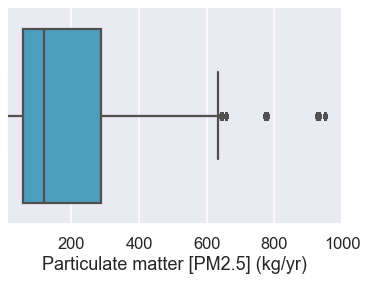

In [115]:
sns.boxplot(x=just_cle['Particulate matter [PM2.5] (kg/yr)'])
plt.xlim(10,1000)

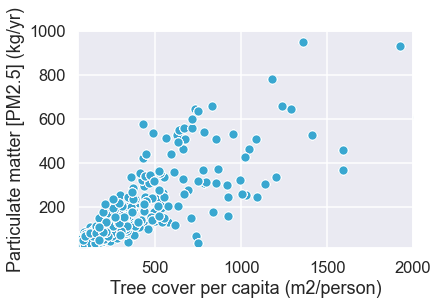

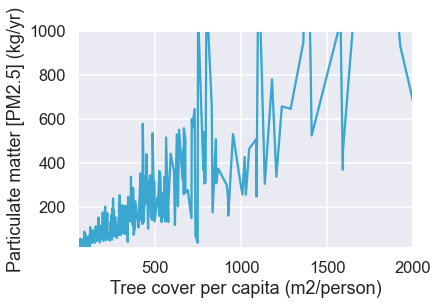

(50.0, 2000.0)

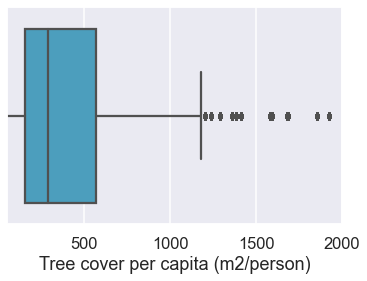

In [116]:
# There are some large outliers. Select values to narrow in on data.
sns.scatterplot(data=just_cle, x='Tree cover per capita (m2/person)', y='Particulate matter [PM2.5] (kg/yr)')
plt.xlim(50,2000)
plt.ylim(10,1000)
plt.show()

sns.lineplot(data=just_cle, x='Tree cover per capita (m2/person)', y='Particulate matter [PM2.5] (kg/yr)')
plt.xlim(50,2000)
plt.ylim(10,1000)
plt.show()

sns.boxplot(x=just_cle['Tree cover per capita (m2/person)'])
plt.xlim(50,2000)

#### LA

In [117]:
just_la = final_df[final_df['EnviroAtlas Community Name']=='Los Angeles, CA']

In [118]:
just_la.head(3)

,Particulate matter [PM2.5] (kg/yr),Particulate matter [PM10] (kg/yr),Percent tree cover,Percent green space,Tree cover per capita (m2/person),Green space per capita (m2/person),Percent tree cover in 50m buffer,Percent tree cover in 15m buffer,EnviroAtlas Community Name,Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr),Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr),Value of asthma exacerbation cases avoided due to nitrogen dioxide removed ($/yr),Value of mortality avoided due to ozone removed ($/yr),Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr),Percent ozone removed annually by tree cover,Percent particulate matter [PM10] removed annually by tree cover,Percent particulate matter [PM2.5] removed annually by tree cover,Percent sulfur dioxide removed annually by tree cover
315288,31.6,1174.2,2510.0,5053.0,173.0,349.0,22.5,21.0,"Los Angeles, CA",232,4,388,9411,0,38.9,101.3,1.4,26.3
315289,31.6,1174.2,2510.0,5053.0,173.0,349.0,22.5,21.0,"Los Angeles, CA",162,3,270,6567,0,30.0,78.3,1.1,20.2
315290,31.6,1174.2,2510.0,5053.0,173.0,349.0,22.5,21.0,"Los Angeles, CA",75,1,125,3048,0,25.5,66.6,1.0,17.2


(0.0, 1000.0)

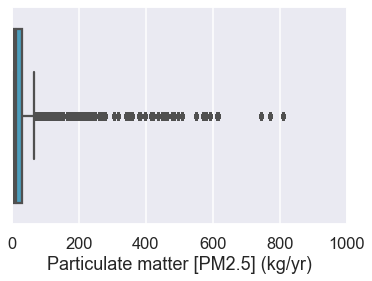

In [119]:
sns.boxplot(x=just_la['Particulate matter [PM2.5] (kg/yr)'])
plt.xlim(0,1000)

In [120]:
final_df['EnviroAtlas Community Name'].unique()

array(['Cleveland, OH', 'Los Angeles, CA'], dtype=object)

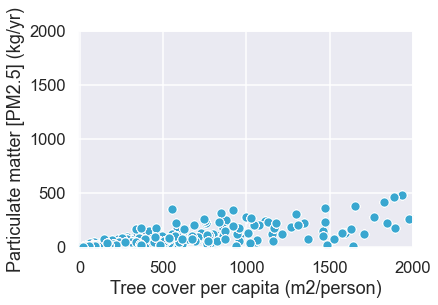

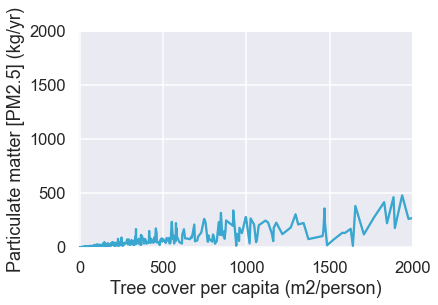

(-10.0, 2000.0)

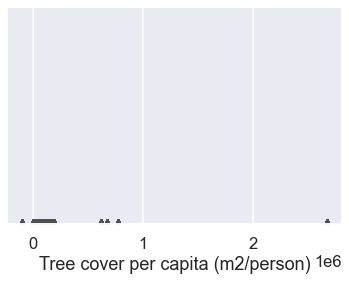

In [128]:
# Select values to narrow in on data.
sns.scatterplot(data=just_la, x='Tree cover per capita (m2/person)', y='Particulate matter [PM2.5] (kg/yr)')
plt.xlim(-10,2000)
plt.ylim(-10,2000)
plt.show()

sns.lineplot(data=just_la, x='Tree cover per capita (m2/person)', y='Particulate matter [PM2.5] (kg/yr)')
plt.xlim(-10,2000)
plt.ylim(-10,2000)
plt.show()

sns.boxplot(x=just_la['Tree cover per capita (m2/person)'])
plt.ylim(-10,2000)

So there's an absolute linear relationship between Percent tree cover and Percent PM2.5 removed annually by tree cover, as well as a linear relationship between Percent green space and Percent PM2.5 removed annually by tree cover. Again, this data is for Cleveland, OH. Our next goal is to look data for Los Angeles, New York, and Tampa.

In [122]:
print('Max :',np.max(just_cle,axis=1))
print('Min :',np.min(just_cle,axis=1))

Max : 0          6279.0
1          6279.0
2         14768.0
3          6279.0
4          6279.0
           ...   
315283    21548.8
315284    21548.8
315285    21548.8
315286    21548.8
315287    21548.8
Length: 315288, dtype: float64
Min : 0         0.0
1         0.0
2         1.0
3         0.0
4         0.0
         ... 
315283    2.0
315284    1.0
315285    1.0
315286    1.0
315287    0.0
Length: 315288, dtype: float64


In [123]:
print('Max :',np.max(just_la,axis=1))
print('Min :',np.min(just_la,axis=1))

Max : 315288       9411.0
315289       6567.0
315290       5053.0
315291       9890.0
315292       7317.0
             ...   
6723603    357232.0
6723604    357232.0
6723605    357232.0
6723606    357232.0
6723607    357232.0
Length: 6408320, dtype: float64
Min : 315288     0.0
315289     0.0
315290     0.0
315291     0.0
315292     0.0
          ... 
6723603    0.0
6723604    0.0
6723605    0.0
6723606    0.0
6723607    0.0
Length: 6408320, dtype: float64


Final_df sheet size is too large when I tried saving it, so I'll save by city. 

In [131]:
# Save Cle 
just_cle.to_csv('df_cle.csv', index=False)

In [132]:
# Save LA
just_la.to_csv('df_la.csv', index=False)